# Customer Lifetime Value (CLV) Analysis

Dalam notebook ini, kita akan melakukan analisis Customer Lifetime Value (CLV) menggunakan machine learning. Kita akan mengikuti beberapa tahapan utama untuk mempersiapkan dan membangun model untuk memprediksi CLV.

# 1. Bussiness Problem Understanding

## Context

Customer lifetime value atau CLV adalah suatu ukuran seberapa berharga suatu customer terhadap perusahaan. Dari nilai tersebut, perusahhan dapat menentukan berapa keuntungan yang dipatkan dari satu penumpang dan biaya yang dikeluarkan untuk memperoleh customer baru atau mempertahankan customer lama. Angka ini cukup penting diketahui oleh suatu perusahaan jika perusahaan ingin secara efektif menargetkan pemasaran kepada pelanggan yang berharga dan bagaimana pelanggan perusahaan tersebut berubah kedepannya.

Salah satu contoh penggunaan analisis CLV terdapat di perusahaan penjual kopi terbesar di Amerika, yaitu starbucks. Analisis yang dilakukan oleh perusahaan menemukan bahwa keniakan 5% tingkat kepuasan suorang customer dapat meningkatkan CLV mereka 25% hingga 95%. Selain itu, Starbucks juga menemukan biaya yang harus dikeluarkan untuk mendapatkan customer baru 6 sampai 7 kali lipat lebih tinggi dari mempertahankan customer yang sudah ada. Dengan memperhatikan hal-hal yang disebutkan sebelumnya, Starbuck mampu memiliki customer dengan CLV hingga 14000 Dollar.

Pada kasus perusahaan asuransi, mengetahui besarnya CLV dapat membantu beberapa kinerja perusahaan, diantaranya :
* Marketing bisa menggunakan informasi CLV untuk menentukan mana customer yang kemungkinan jarang melakukan klaim dan membayar premi yang tinggi. Marketing dapat memilih customer yang menghasilkan keuntungan besar untuk perusahaan,
* customer service bisa menentukan bagaimana metode yang tepat digunakan untuk tiap jenis customernya, sehingga tidak ada biaya yang tinggi digunakan kepada customer yang memiliki nilai CLV yang rendah,
* dan bagian finance dan risk management dapat menghitung bagaimana seorang customer dapat memberikan keuntungan dan langkah yang perlu dilakukan ketika customer pergi.

## Problem Statement

Lifetime value bisa  dihitung berdasarkan data dari sejarah customer bersama perusahaan, dalam konteks perusahaan asuransi bisa dihitung berdasarkan total premi yang dibayarkan dikurang klaim dan biaya oprasional yang dikelurakan oleh perusahaan pada customer tersebut. Menghitung customer lifetime value berdasarkan sejarahnya membutuhkan cukup banyak waktu (menghitung keseluruhan waktu customer bersama perusahaan). Saat perhitungan sudah selesai, strategi bisnis mungkin sudah terlambat diberlakukan. Contohnya pada penawaran perpanjangan asuransi. Diperlukan metode yang dapat memprediksi customer lifetime value.

Dengan memprediksi customer lifetime value perusahaan dapat menuntukan mana customer yang mungkin memiliki value yang tinggi dan mana yang tidak. Perusahaan bisa memfokuskan kegiatan marketing pada customer value yang tinggi sehingga pengeluaran untuk marketing jatuh pada customer yang tinggi, tidak pada customer yang memiliki value yang rendah. Hal ini dapat meningkatkan effesiensi perusahaan, walaupun kegunaan prediksi hanya berguna ketika prediksinya tepat.

## Goals

Pemodelan regresi dapat digunakkan untuk mengetahui prediksi nilai customer lifetime value berdasarkan variabel variabel customer asuransi. Machine learning dapat membantu membuat model tersebut. Pada capstone project modul 3 ini, model untuk mengestimasi berapa Customer Lifetime Value pada customer perusahaan asuransi akan dibuat.

## Analythic Approach

1. Melakukan Explantory Data Analysis (EDA) pada dataset. 
1. Melakukan Feature Engineering pada feature jika dibutuhkan.
1. Melakukan Preprocessing pada dataset.
1. Melakukan Benchmarking pada beberapa model regressi untuk memilih model yang paling tepat untuk dataset.
1. Melakukan Hyperparameter Tuning pada model terpilih untuk mendapatkan hasil error yang lebih rendah.

## Metric Evaluation

Pada proses pemodelan machine learnng ini, metric evaluation yang digunakan pada pemodelan ini adalah RSME, MAE, dan MAPE. Ketiga evaluasi digukan untuk menunjukan seberapa baik model dapat memprediksi data set. RSME digunakan sebagai evaluasi untuk optimisasi. Hal ini dilakukan karena RSME memberikan penalti yang lebih besar pada error yang besar karena errornya dikuadratkan, sehingga cocok untuk meminimalisir error pada saat optimasi.

$$RMSE =   \sqrt{ \frac{ \sum\nolimits_{i=1}^{n} ( Y_i - \widehat{Y_i})^2 }{n} } $$
$$Root Mean Squared Error$$
$n$ = Jumlah data<br>
$i$ = variabel i<br>
$Y_i$ = Data aktual<br>
$\widehat{Y_i}$ = Data Prediksi

MAE dan MAPE digunakan karena lebih mudah diinterpretasikan, dimana hasil error nya hanya diselisihkan dengan hasil aktual pada MAE dan errornya dibagi data aktual pada MAPE. Mape juga memberikan keutungan ketika nilai CLV yang tinggi memiliki error yang tinggi akan tetapi persentase dari dari data tersebut sebutulnya rendah.
$$MAE =  \frac{\sum\nolimits_{i=1}^{n} |Y_i - \widehat{Y_i}|}{n}$$
$$Mean Absolute Error$$

$$MAPE =  \frac{1}{n}   \sum_{i=1}^{n} | \frac{Y_i - \widehat{Y_i}}{Y_i}|$$
$$Mean Absolute Percentage Error$$

# 1. DATA UNDERSTANDING

Mari kita mulai dengan memuat dataset.

In [22]:
# imports.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Menghilangkan FutureWarnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [23]:
# dataset
file_path = "data_customer_lifetime_value.csv"
df = pd.read_csv(file_path)

total_rows, total_columns = df.shape

# jumlah baris dan kolom
print(f"Number of Rows and Column : {df.shape}\n")

# tipe data tiap kolom
print(df.dtypes)

Number of Rows and Column : (5669, 11)

Vehicle Class               object
Coverage                    object
Renew Offer Type            object
EmploymentStatus            object
Marital Status              object
Education                   object
Number of Policies         float64
Monthly Premium Auto       float64
Total Claim Amount         float64
Income                     float64
Customer Lifetime Value    float64
dtype: object


In [24]:
df.head()

Vehicle Class  Coverage Renew Offer Type EmploymentStatus Marital Status  \
0  Four-Door Car  Extended           Offer1          Retired       Divorced   
1  Four-Door Car     Basic           Offer1         Employed        Married   
2   Two-Door Car     Basic           Offer1          Retired        Married   
3  Four-Door Car   Premium           Offer3         Disabled        Married   
4   Two-Door Car     Basic           Offer3    Medical Leave        Married   

              Education  Number of Policies  Monthly Premium Auto  \
0  High School or Below                 2.0                  90.0   
1               College                 6.0                  62.0   
2                Master                 2.0                  62.0   
3  High School or Below                 1.0                 116.0   
4  High School or Below                 1.0                  62.0   

   Total Claim Amount   Income  Customer Lifetime Value  
0          571.479602  11828.0             10083.486880  
1          114.514440  44762.0              4943.386117  
2          257.248789  21514.0             11981.984810  
3          556.800000  17913.0              4550.856045  
4          355.820799  19030.0              2372.155492

|Features|Deskripsi|
|-----|-----|
|Vehicle Class|Tipe kendaraan yang dimiliki oleh customer|
|Coverage|Jenis perlindungan asuransi yang dipilih customer|
|Renew Offer type|Tipe penawaran yang diterima oleh customer saat memperbarui asuransi|
|Employment Status|Status pekerjaan customer|
|Marital Status|Status pernikahan customer|
|Education|Tingkat pendidikan customer|
|Number of Policies|Jumlah asuransi yang dimiliki customer|
|Monthly Premium Auto|Jumlah premi bulanan yang dibayar oleh customer untuk asuransi mobil|
|Total Claim Amount|Jumlah total klaim yang diajukan oleh customer selama berlangganan|
|Income|Pendapatan tahunan customer|
|Customer Lifetime Value|Customer Lifetime value|

In [25]:
display(
    df.describe(),
    df.describe(include="object"),
    pd.DataFrame(
        {
            "Unique": [df[col].nunique() for col in df.columns],
            "Samples": [sorted(df[col].unique())[:10] for col in df.columns],
        },
        index=df.columns,
    ),
)

Number of Policies  Monthly Premium Auto  Total Claim Amount  \
count         5669.000000           5669.000000         5669.000000   
mean             2.979361             93.026989          431.407103   
std              2.393187             34.551795          287.558038   
min              1.000000             61.000000            0.423310   
25%              1.000000             68.000000          266.932542   
50%              2.000000             82.000000          379.200000   
75%              4.000000            109.000000          549.986128   
max              9.000000            297.000000         2759.794354   

             Income  Customer Lifetime Value  
count   5669.000000              5669.000000  
mean   37868.188569              8029.874592  
std    30490.490723              6916.708246  
min        0.000000              1898.007675  
25%        0.000000              3954.344534  
50%    34322.000000              5800.188903  
75%    62464.000000              9031.214859  
max    99934.000000             83325.381190

Vehicle Class Coverage Renew Offer Type EmploymentStatus  \
count            5669     5669             5669             5669   
unique              6        3                4                5   
top     Four-Door Car    Basic           Offer1         Employed   
freq             2858     3477             2292             3541   

       Marital Status Education  
count            5669      5669  
unique              3         5  
top           Married  Bachelor  
freq             3305      1703

Unique  \
Vehicle Class                 6   
Coverage                      3   
Renew Offer Type              4   
EmploymentStatus              5   
Marital Status                3   
Education                     5   
Number of Policies            9   
Monthly Premium Auto        191   
Total Claim Amount         3274   
Income                     3625   
Customer Lifetime Value    5049   

                                                                   Samples  
Vehicle Class            [Four-Door Car, Luxury Car, Luxury SUV, SUV, S...  
Coverage                                        [Basic, Extended, Premium]  
Renew Offer Type                          [Offer1, Offer2, Offer3, Offer4]  
EmploymentStatus         [Disabled, Employed, Medical Leave, Retired, U...  
Marital Status                                 [Divorced, Married, Single]  
Education                [Bachelor, College, Doctor, High School or Bel...  
Number of Policies           [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]  
Monthly Premium Auto     [61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68....  
Total Claim Amount       [0.42331, 0.517753, 0.887629, 1.332349, 1.5878...  
Income                   [0.0, 10037.0, 10105.0, 10194.0, 10211.0, 1023...  
Customer Lifetime Value  [1898.007675, 1898.683686, 1904.000852, 1918.1...

In [26]:
print(f"{df[(df["Income"] == 0)]["EmploymentStatus"].value_counts()}\n")
print(f"{df["Number of Policies"].value_counts().sort_index(ascending=True)}")

EmploymentStatus
Unemployed    1429
Name: count, dtype: int64

Number of Policies
1.0    2008
2.0    1413
3.0     727
4.0     251
5.0     270
6.0     236
7.0     271
8.0     229
9.0     264
Name: count, dtype: int64


Pada tabel deskriptif di atas, dapat disimpulkan bahwa:

- Terdapat nilai 0 pada kolom Income, yang disebabkan oleh pelanggan yang berstatus Unemployed dan tidak memiliki pemasukan.
- Tipe pelanggan lain, seperti yang cuti medis(Medical Leave), penyandang disabilitas(Disabled), dan pensiunan(Retired) memiliki penghasilan, mungkin karena tunjangan pensiun atau program bantuan meskipun tidak aktif bekerja
- Tidak ditemukan nilai yang hilang (missing value) dalam dataset.
- Terdapat 7 kolom kategorik, yaitu 'Vehicle Class', 'Coverage', 'Renew Offer Type', 'Employment Status', 'Marital Status' dan 'Education' . 
- Terdapat 4 kolom numerik, yaitu 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value' dan 'Number of Policies.
- Kolom 'Customer Lifetime Value' akan digunakan sebagai target, sedangkan 10 kolom lainnya berfungsi sebagai variabel independen. 
- Kolom 'Number of Policies' memiliki rentang nilai antara 1 hingga 9. Meskipun secara teknis kolom ini tergolong **numerik**, kita akan mengubahnya menjadi data **kategorik** untuk analisis lebih lanjut.

# 2. EXPLORATORY DATA

## Distribution of Customer Lifetime Values

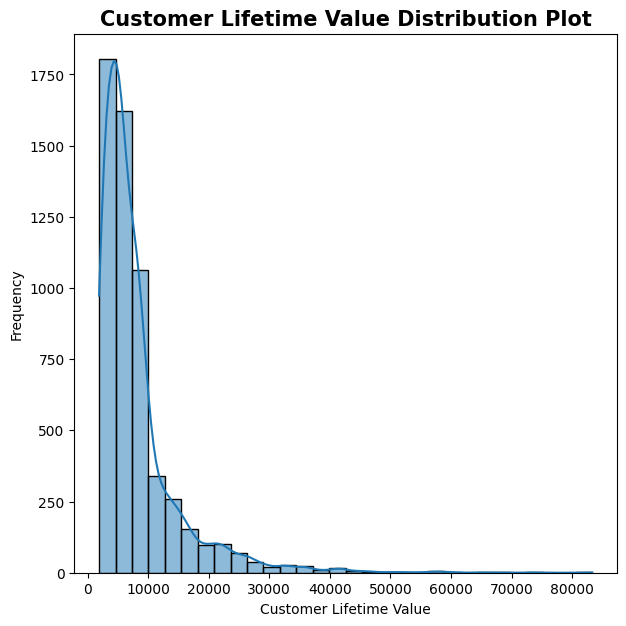

In [27]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.histplot(df["Customer Lifetime Value"], kde=True, bins=30)  # Histogram dengan KDE
plt.title("Customer Lifetime Value Distribution Plot", size=15, weight="bold")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Frequency")
plt.show()

In [28]:
df["Customer Lifetime Value"].skew()

np.float64(3.06110718900048)

Berdasarkan plot distribusi Customer Lifetime Value (CLV) di atas, terlihat bahwa distribusi tersebut mengalami right-skewed atau terdistorsi ke kanan, yang menunjukkan adanya skewness positif. Oleh karena itu, kita akan menerapkan log transformation untuk mengurangi skewness dan menggunakan metode yang lebih robust, seperti decision trees, termasuk random forest atau gradient boosting yang lebih robust terhadap outliers.

## Data Cleaning

 Data cleaning sangat penting untuk memastikan bahwa data yang kita gunakan akurat, konsisten, dan bebas dari kesalahan. Proses ini melibatkan Missing Values, Data Duplikat, Data Error, serta mengatasi Outliers yang dapat mempengaruhi hasil analisis.

### Missing Values
Missing values dapat merusak integritas data dan mengurangi kualitas analisis, data yang tidak lengkap dapat menyebabkan hasil analisis yang tidak akurat. 

In [29]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64


### Data Anomali
Kita perlu memeriksa data anomali, seperti kasus di mana total Income = 0 tetapi EmploymentStatus bukan 'Unemployed'. Perlu dilihat apakah ada status pekerjaan selain 'Unemployed' yang tidak memiliki penghasilan

In [30]:
print(
    f'Jumah data Pekerja yang tidak memiliki Gaji : {len(df[(df["Income"] == 0) & (df["EmploymentStatus"] != "Unemployed")])}'
)
print(f'Jumah data Pengangguran : {len(df[(df["EmploymentStatus"] == "Unemployed")])}')

Jumah data Pekerja yang tidak memiliki Gaji : 0
Jumah data Pengangguran : 1429


Kita tidak akan menghapus data dengan status Unemployed yang tidak memiliki penghasilan, karena data tersebut masih diperlukan untuk analisis yang akan dilakukan selanjutnya

### Duplicated Data
Kita perlu memeriksa setiap data duplikat dalam dataset karena dapat memengaruhi analisis

In [31]:
df_duplicates = df.duplicated().sum()
print(f"Jumlah kolom duplikat : {df_duplicates}\n")  # cek data duplikat

df[df.duplicated()].sort_values(by="Customer Lifetime Value").head()

Jumlah kolom duplikat : 618



Vehicle Class Coverage Renew Offer Type EmploymentStatus Marital Status  \
4883  Four-Door Car    Basic           Offer1       Unemployed       Divorced   
3524  Four-Door Car    Basic           Offer1       Unemployed       Divorced   
3673  Four-Door Car    Basic           Offer1       Unemployed       Divorced   
2675  Four-Door Car    Basic           Offer1       Unemployed       Divorced   
3968  Four-Door Car    Basic           Offer3          Retired        Married   

                 Education  Number of Policies  Monthly Premium Auto  \
4883               College                 1.0                  66.0   
3524               College                 1.0                  66.0   
3673               College                 1.0                  66.0   
2675               College                 1.0                  66.0   
3968  High School or Below                 1.0                  61.0   

      Total Claim Amount   Income  Customer Lifetime Value  
4883               316.8      0.0              2004.350666  
3524               316.8      0.0              2004.350666  
3673               316.8      0.0              2004.350666  
2675               316.8      0.0              2004.350666  
3968               292.8  27972.0              2227.072755

Ditemukan 618 data duplikat pada dataset ini. Kita akan menghapus data duplikat tersebut untuk memastikan analisis yang lebih akurat dan menghindari bias yang dapat terjadi akibat data yang berulang

In [32]:
# Menghapus Baris Duplikat
df.drop_duplicates(inplace=True)

print(
    f"Jumlah kolom duplikat setelah cleaning : {df.duplicated().sum()}"
)  # cek kembali data duplikat
print(
    f"Persentase kolom terhapus : {(df_duplicates/total_rows*100):.2f}%"
)  # cek kembali data duplikat

Jumlah kolom duplikat setelah cleaning : 0
Persentase kolom terhapus : 10.90%


Setelah menghapus data duplikat, langkah selanjutnya adalah memeriksa jumlah variabel kategorikal dalam dataset.

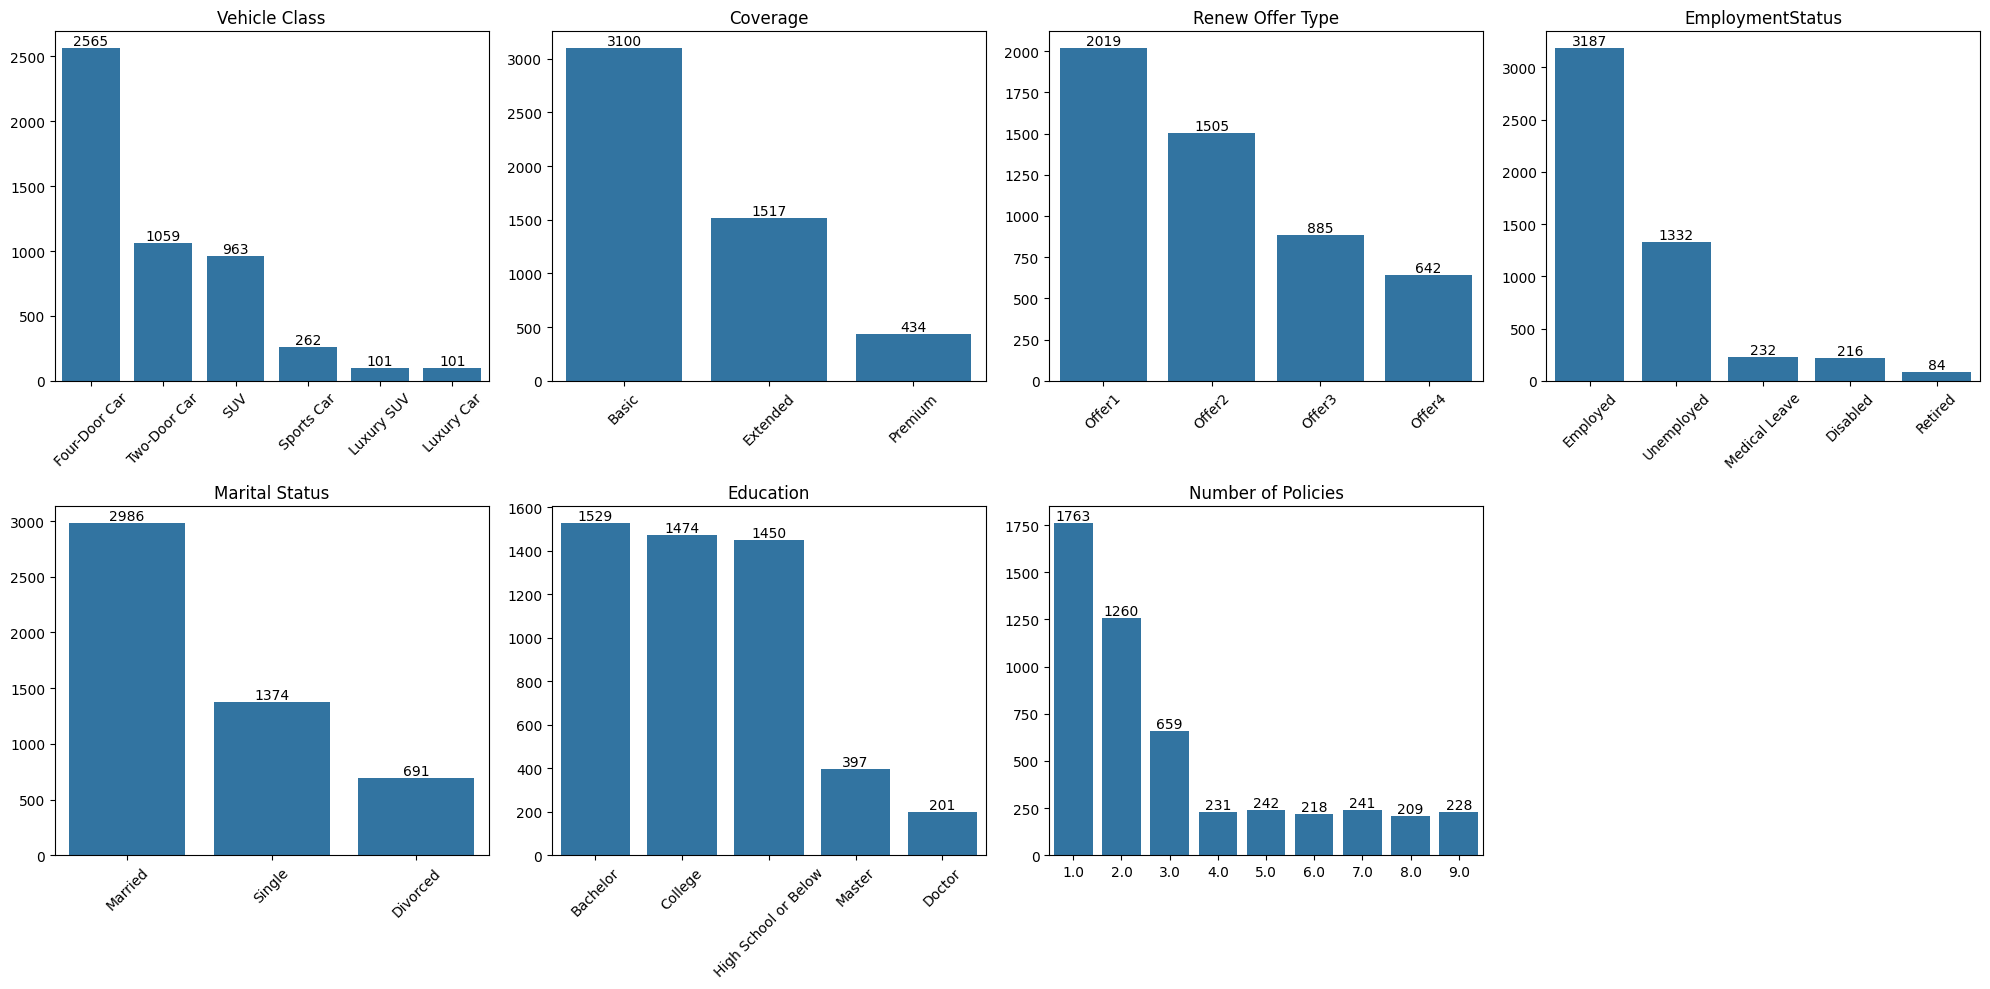

In [33]:
categorical_features = [
    "Vehicle Class",
    "Coverage",
    "Renew Offer Type",
    "EmploymentStatus",
    "Marital Status",
    "Education",
    "Number of Policies",
]

plt.figure(figsize=(20, 10))
# Membuat subplot (2 baris, 4 kolom)
for i in range(len(categorical_features)):
    counts = df[categorical_features[i]].value_counts().sort_values(ascending=False)
    plt.subplot(2, 4, i + 1)
    ax = sns.barplot(x=counts.index, y=counts.values)
    # Menambahkan label jumlah di atas setiap bar
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="bottom",
        )
    plt.title(f"{categorical_features[i]}")
    plt.xticks(rotation=45)
    plt.xlabel("")
    if categorical_features[i] == "Number of Policies":
        plt.xticks(rotation=0)

plt.tight_layout()  # Menjaga layout agar tidak saling bertumpukan
plt.show()

|Features|Deskripsi|
|-----|-----|
|Vehicle Class| Data menunjukkan bahwa pelanggan lebih banyak menggunakan kendaraan 4 pintu, dengan jumlah pelanggan yang jauh lebih banyak dibandingkan tipe kendaraan lainnya. Hal ini mungkin disebabkan oleh ketersediaan kendaraan dengan 4 pintu lebih ekonomis atau umum di pasar|
|Coverage| Mayoritas pelanggan memilih tipe Basic. Cakupan extended dan premium mengikuti setelahnya|
|Renew Offer Types| Jenis pembaruan Offer1 memiliki jumlah pelanggan tertinggi|
|Employment Status| Sebagian besar pelanggan memiliki pekerjaan yang memungkinkan mereka untuk membeli kendaraan|
|Marital Status| Pelanggan yang sudah menikah mendominasi data, menunjukkan bahwa status pernikahan memiliki pengaruh terhadap kepemilikan kendaraan|
|Education| Pelanggan dengan latar belakang pendidikan Bachelor, College, dan High School or Below memiliki jumlah yang hampir serupa. Sebaliknya, pelanggan yang memiliki gelar Master dan Doctor terlihat jauh lebih sedikit|
|Number of Policies| Pelanggan yang memiliki satu asuransi tercatat lebih banyak dibandingkan mereka yang memiliki dua atau tiga asuransi. Pelanggan dengan lebih dari tiga asuransi menunjukkan jumlah yang serupa|

### Outliers
Outliers dapat mempengaruhi analisis statistik dan model prediktif. Oleh karena itu, kita perlu memahami apakah mereka benar-benar signifikan atau hanya hasil dari kesalahan.

In [34]:
numerical_features = [
    "Monthly Premium Auto",
    "Total Claim Amount",
    "Income",
    "Customer Lifetime Value",
]


def outliers_():
    """
    Membuat visualisasi boxplot dan histogram untuk fitur numerik yang ditentukan.
    """
    # Daftar fitur numerik
    # Membuat figure untuk boxplot dan histogram
    plt.figure(figsize=(20, 10))

    # Membuat boxplot
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(2, 4, i)  # Atur layout subplot (2 baris, 4 kolom)
        sns.boxplot(x=df[feature])
        plt.title(f"{feature} - Boxplot")
        plt.xlabel("")
        plt.ylabel("")

    # Membuat histogram
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(2, 4, i + 4)  # Baris kedua untuk histogram
        sns.histplot(df[feature], kde=True)
        plt.title(f"{feature} - Histogram")
        plt.xlabel("")
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

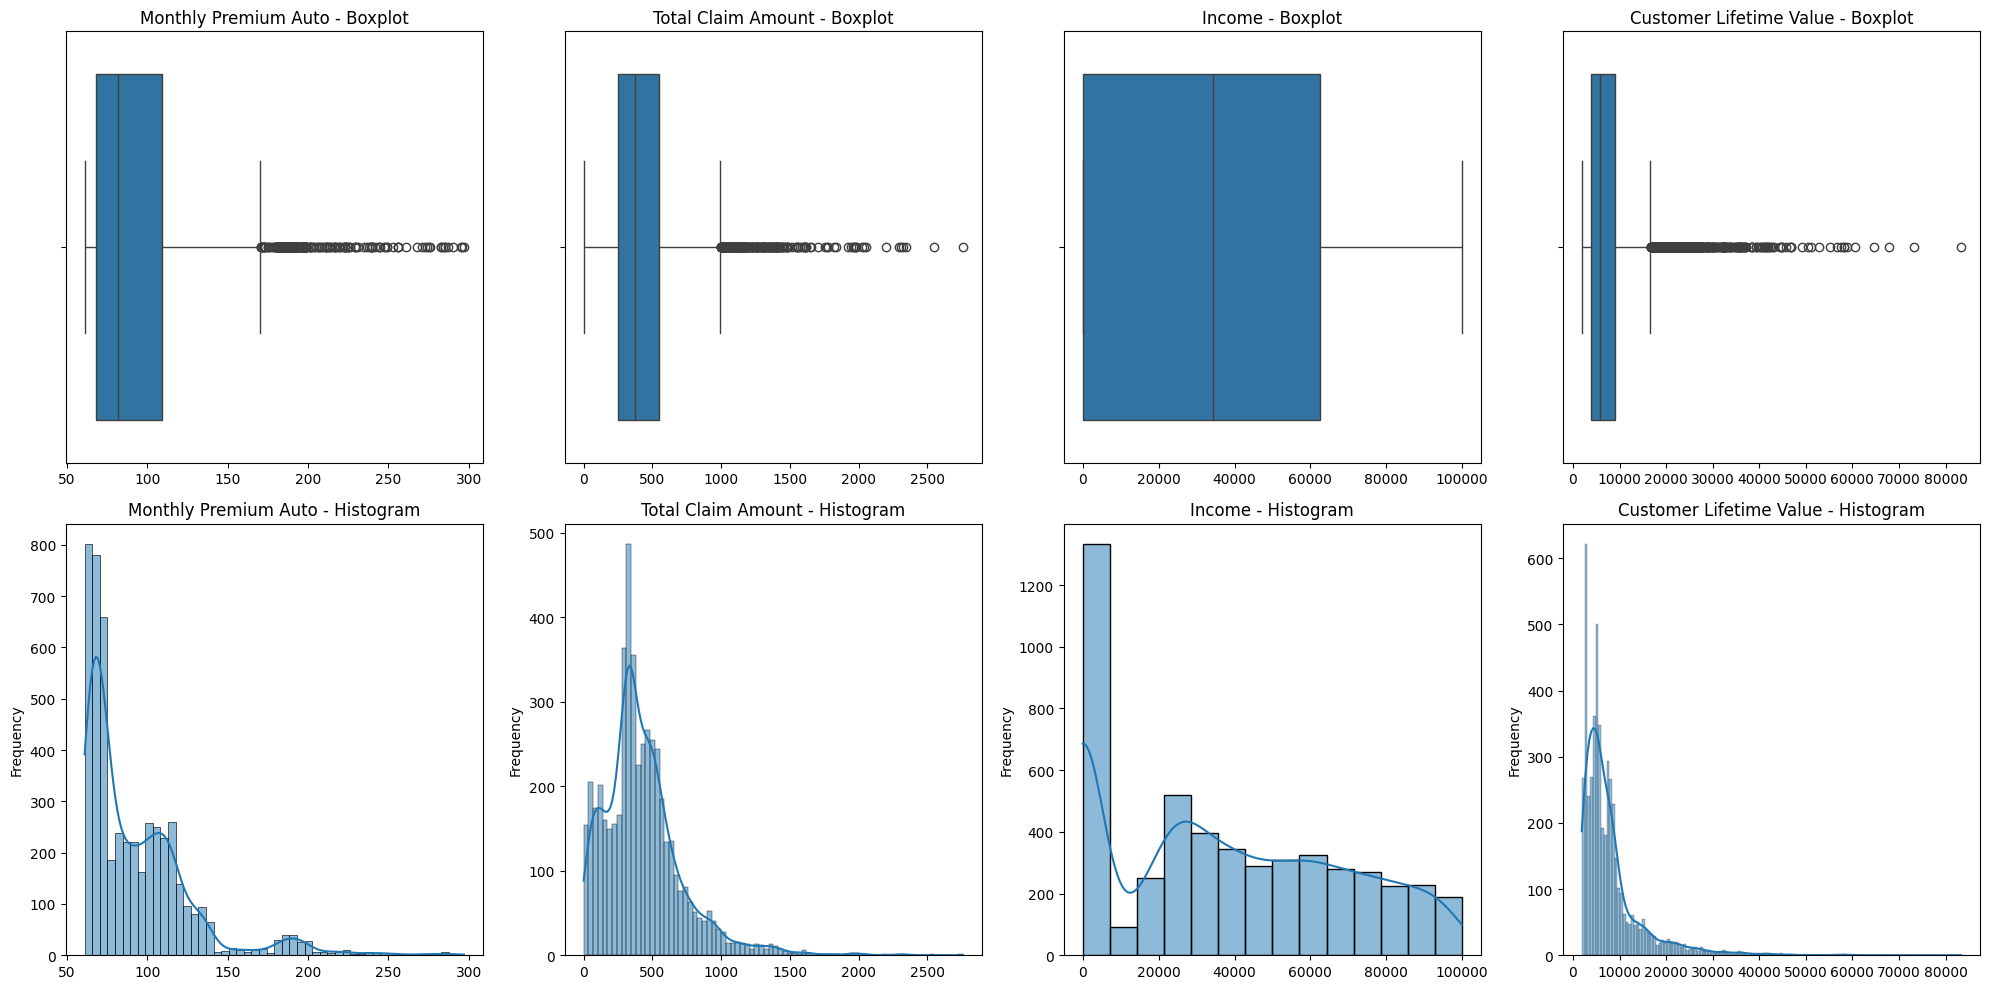

In [35]:
outliers_()

- Pada boxplot di atas, satu-satunya fitur yang tidak memiliki outlier hanya fitur Income.
- Pada histogram dapat disimpulkan bahwa semua fitur tidak terdistribusi normal

In [36]:
# Inisialisasi DataFrame untuk data tanpa outlier
df_old = df.copy()

# # Deteksi outlier dan bagi data
# for feature in numerical_features:
#     # Hitung Q1 (25th percentile) dan Q3 (75th percentile)
#     Q1 = df[feature].quantile(0.25)
#     Q3 = df[feature].quantile(0.75)
#     IQR = Q3 - Q1

#     # Tentukan batas bawah dan batas atas
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Filter outlier
#     df_outlier = (df[feature] < lower_bound) | (df[feature] > upper_bound)

#     # Hapus outlier dari df_cleaned
#     df = df[~df_outlier]


def remove_outliers(numerical_features):
    global df  # Pastikan untuk menggunakan df global

    for feature in numerical_features:
        # Hitung Q1 (25th percentile) dan Q3 (75th percentile)
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Tentukan batas bawah dan batas atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter outlier
        df_outlier = (df[feature] < lower_bound) | (df[feature] > upper_bound)

        # Hapus outlier dari df
        df = df[~df_outlier]

In [37]:
# Fitur numerik yang ingin dianalisis
# numerical_features = [
#     "Monthly Premium Auto",
#     "Total Claim Amount",
#     "Customer Lifetime Value",
# ]

remove_outliers(
    [
        "Monthly Premium Auto",
        "Total Claim Amount",
        "Customer Lifetime Value",
    ]
)

In [38]:
def outlier_comparison():
    """
    Membuat visualisasi histogram untuk membandingkan jumlah kategori sebelum dan setelah penghapusan outlier.
    """
    # Daftar fitur kategorikal
    cat_features = [
        "Vehicle Class",
        "Coverage",
        "Renew Offer Type",
        "EmploymentStatus",
        "Marital Status",
        "Education",
    ]

    # Membuat figure untuk histogram
    plt.figure(figsize=(20, 10))

    # Iterasi melalui setiap fitur kategorikal
    for i, feature in enumerate(cat_features, 1):
        plt.subplot(2, 3, i)  # Mengatur subplot dalam grid 3x2

        # Histogram sebelum penghapusan outlier
        sns.countplot(
            data=df_old,
            x=feature,
            order=df_old[feature].value_counts().index,
            alpha=0.5,
            color="blue",
            label="Before Outlier Removal",
        )

        # Histogram setelah penghapusan outlier
        sns.countplot(
            data=df,
            x=feature,
            order=df_old[feature].value_counts().index,
            alpha=0.8,
            color="orange",
            label="After Outlier Removal",
        )

        plt.suptitle("Comparison Before and After Outlier Removal", size=20)
        plt.title(f"{feature}")
        plt.xlabel("")
        plt.ylabel("Count")
        plt.legend()

    plt.tight_layout()  # Menyesuaikan layout
    plt.show()

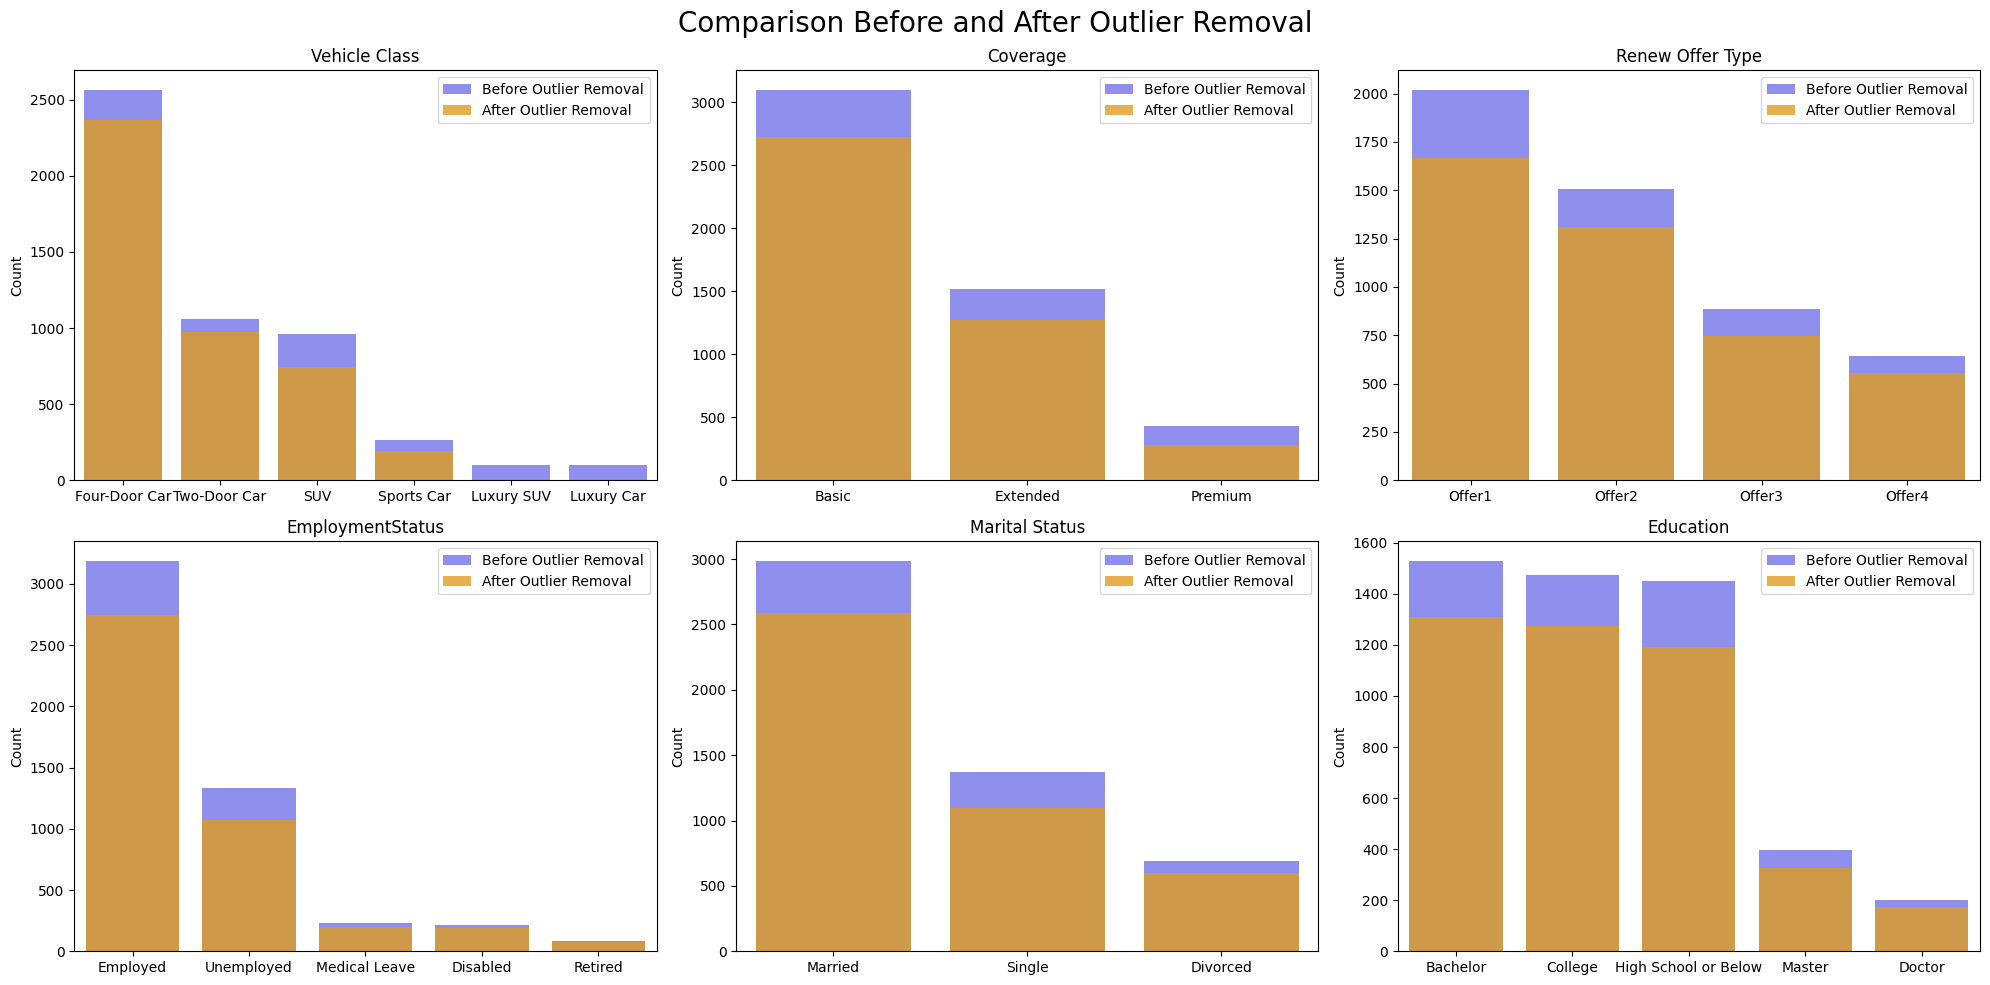

In [39]:
outlier_comparison()

In [40]:
df["Vehicle Class"].value_counts()

Vehicle Class
Four-Door Car    2368
Two-Door Car      975
SUV               742
Sports Car        192
Name: count, dtype: int64

Setelah penghapusan outliers, kita dapat melihat bahwa 2 kategori dari 'Vehicle Class', yaitu 'Luxury Car' dan 'Luxury SUV' tidak terlihat. Oleh karena itu, kita perlu memeriksa fitur `numerik` mana yang berpengaruh terhadap 'Vehicle Class' dengan membandingkan setiap fitur numerik.

In [41]:
# imports.py
from itertools import combinations

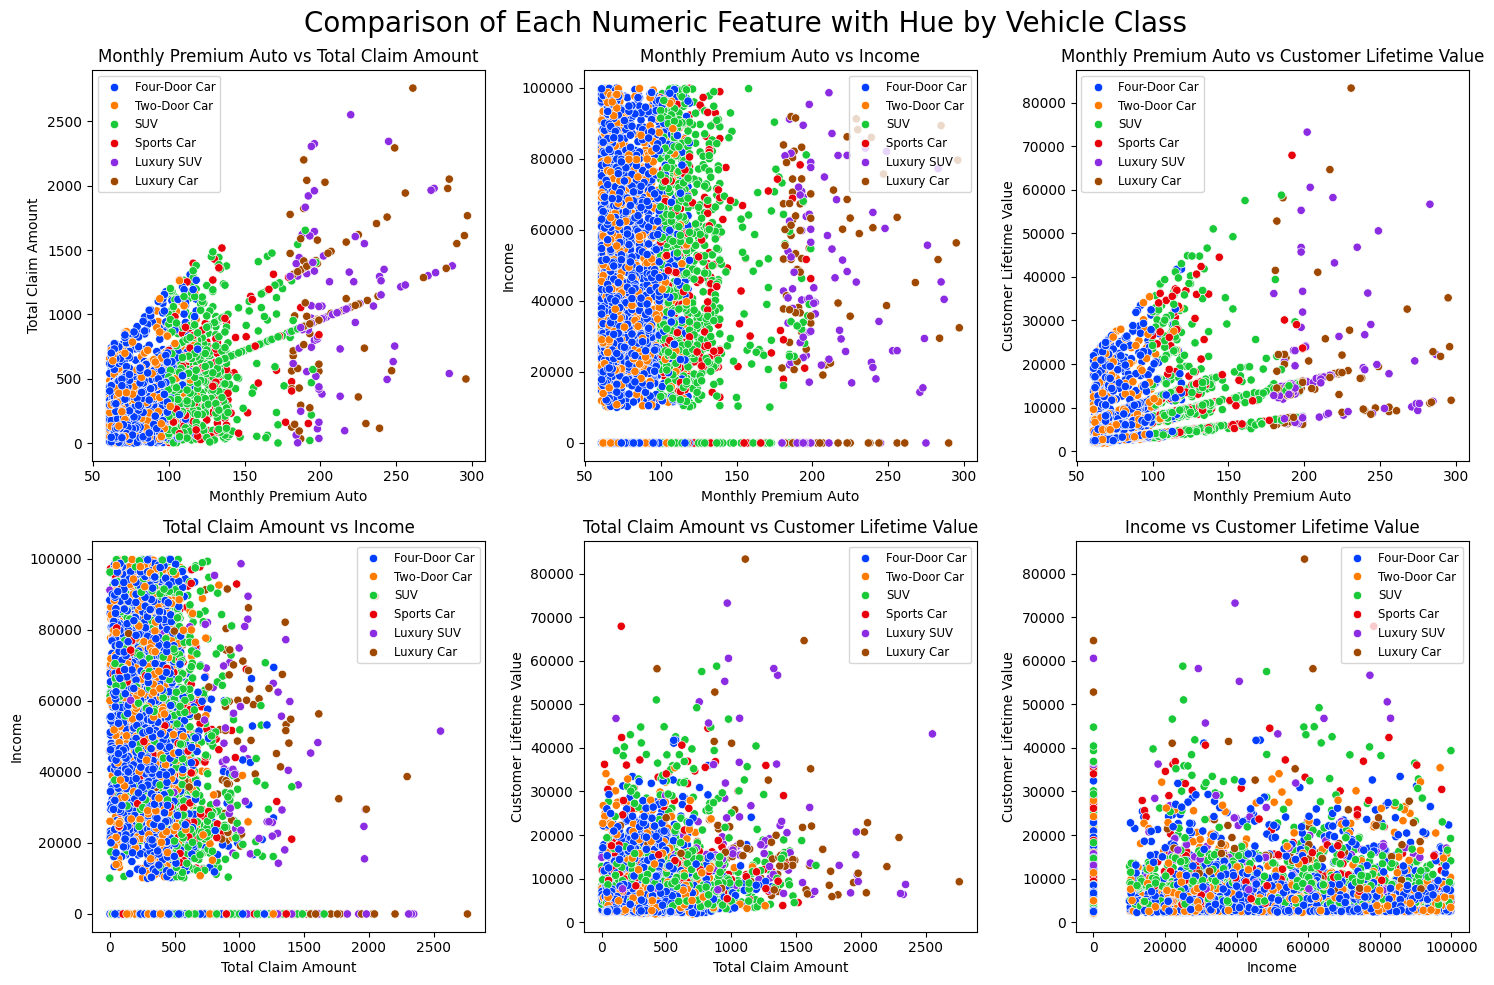

In [42]:
# Misalkan dataset sudah dimuat ke dalam DataFrame bernama clv
# clv = pd.read_csv('path_to_your_dataset.csv')


# Buat kombinasi semua pasangan fitur
feature_combinations = combinations(numerical_features, 2)

# Set ukuran gambar
plt.figure(figsize=(15, 10))
plt.suptitle("Comparison of Each Numeric Feature with Hue by Vehicle Class", size=(20))
# Loop untuk membuat scatterplot
for i, (x, y) in enumerate(feature_combinations, start=1):
    plt.subplot(2, 3, i)  # Menyesuaikan dengan jumlah subplot
    sns.scatterplot(data=df_old, x=x, y=y, hue="Vehicle Class", palette="bright")
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    # Mengatur ukuran font legend
    plt.legend(fontsize="small", title_fontsize="medium")

plt.tight_layout()
plt.show()

Pada grafik di atas, dapat dipastikan bahwa fitur numerik yang mempengaruhi 'Vehicle Class' sehingga menyebabkan hilangnya dua kategori yaitu 'Luxury Car' dan 'Luxury SUV' adalah fitur 'Monthly Premium Auto' dan 'Total Claim Amount'. Oleh karena itu, kita hanya akan menghapus outlier pada fitur 'Customer Lifetime Value'.

In [43]:
df = df_old.copy()  # Kembali ke dataframe sebelum penghapusan outliers

remove_outliers(
    [
        # "Monthly Premium Auto",   # Fitur ini yang paling berpengaruh terhadap hilangnya kategori 'Luxury Car' dan 'Luxury SUV'
        # "Total Claim Amount",     # Fitur ini juga berpengaruh, tetapi tidak sesignifikan fitur Monthly Premium Auto
        "Customer Lifetime Value",
    ]
)

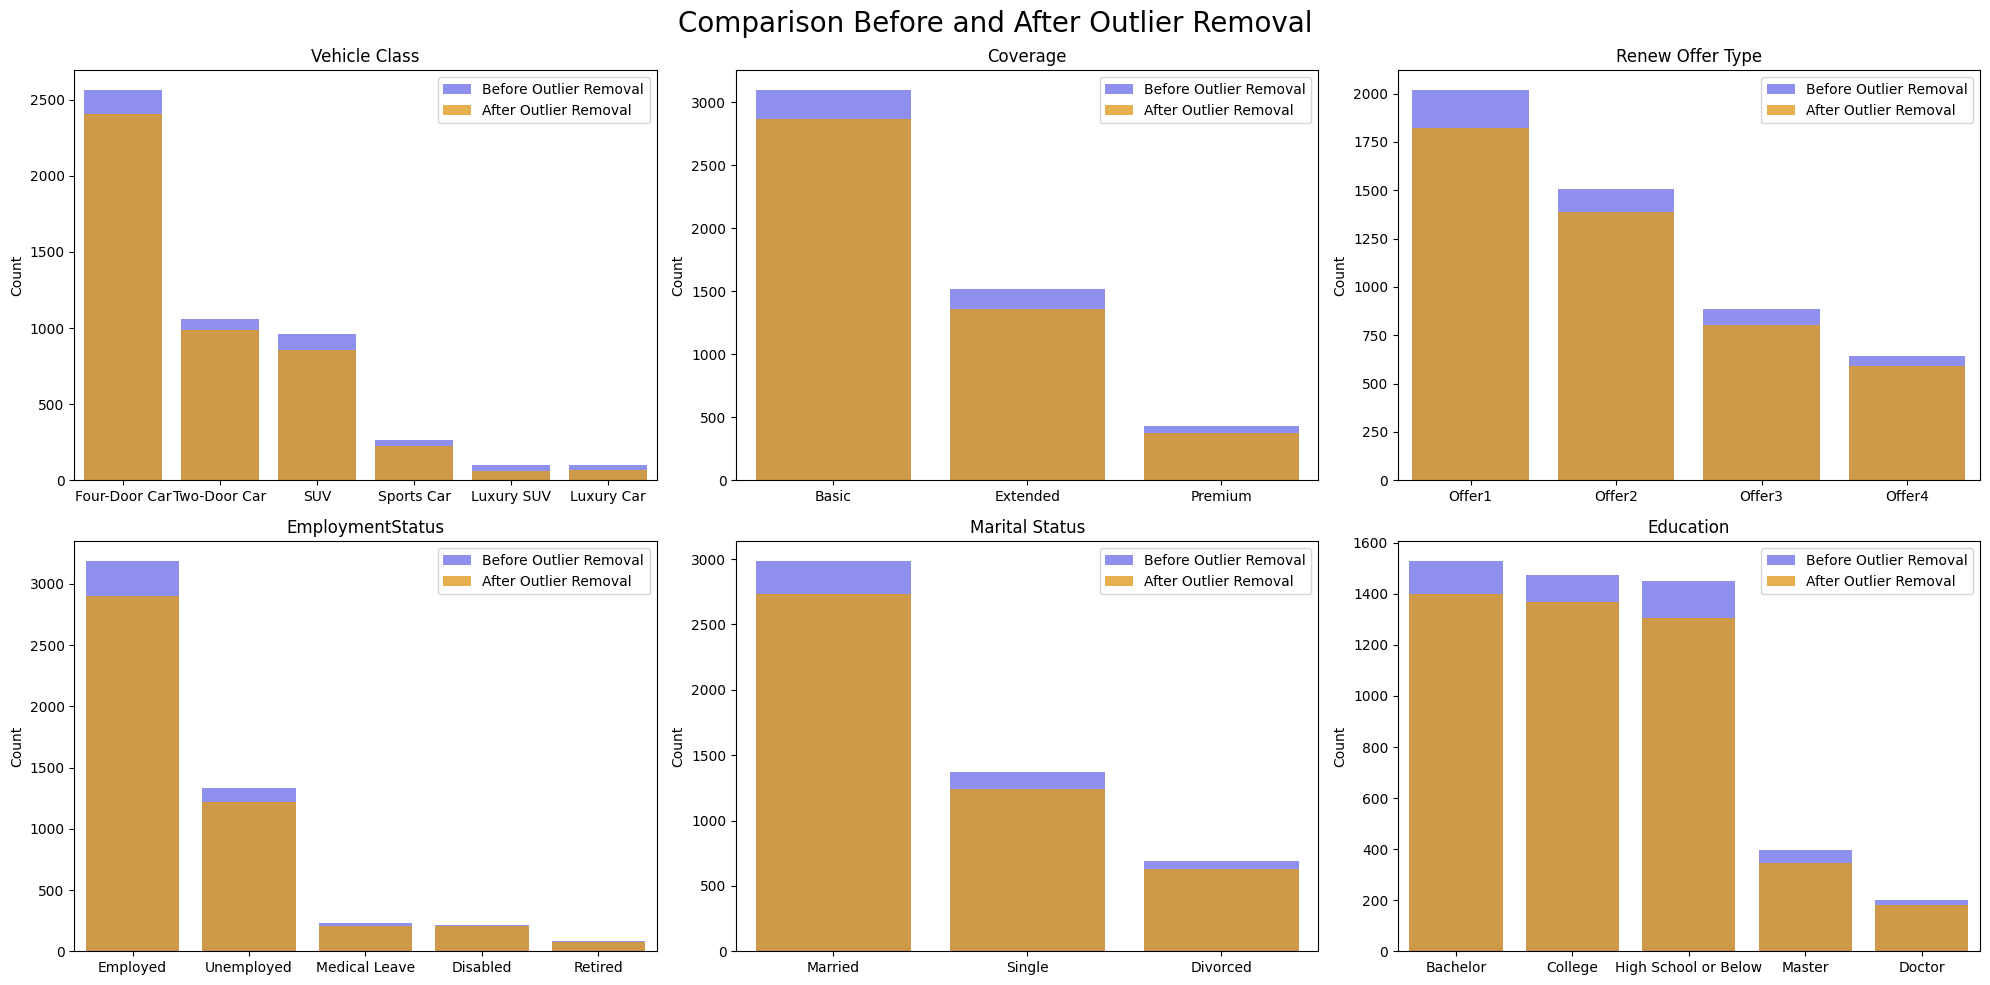

In [44]:
outlier_comparison()

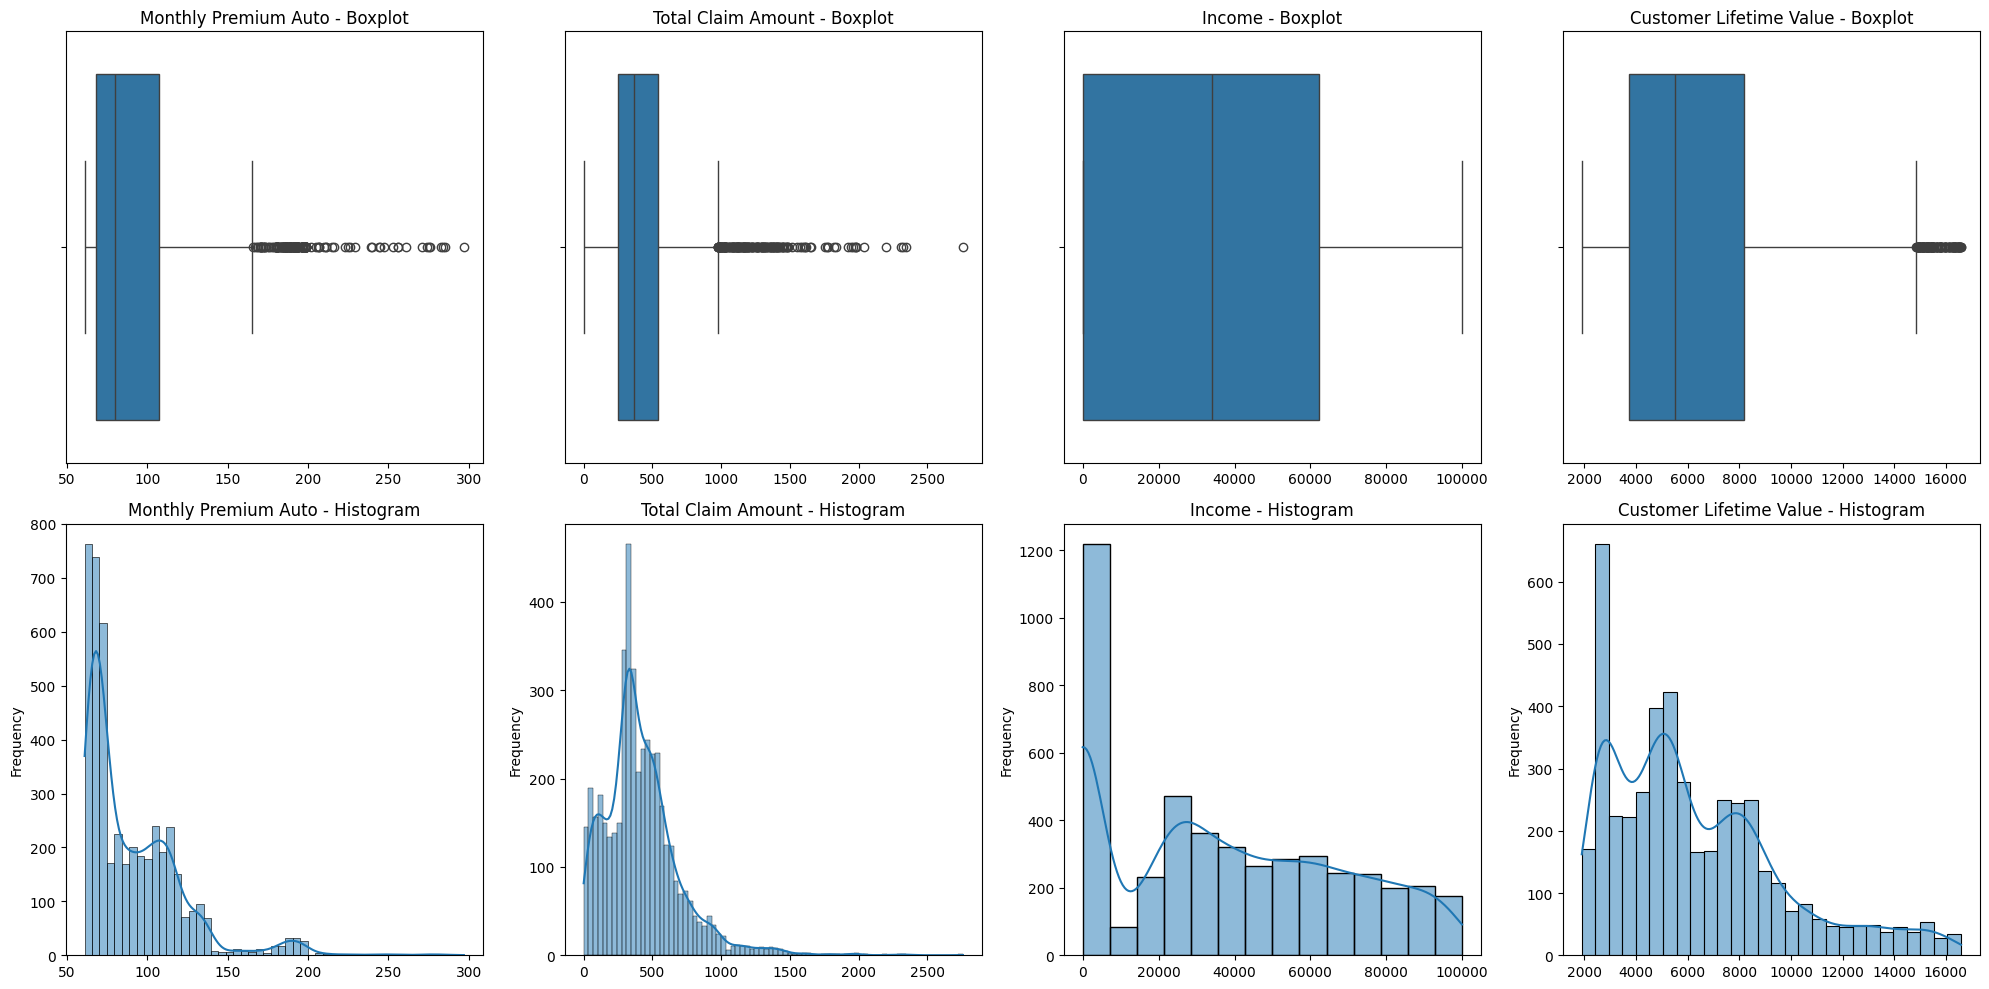

In [45]:
outliers_()

Kita akan menerapkan log transformation untuk mengurangi skewness dalam distribusi data. Selain itu, kita akan menggunakan metode yang lebih robust terhadap outlier, seperti 'Decision Trees', termasuk 'Random Forest' dan 'Gradient Boosting'. Metode ini dapat menangani outlier dengan lebih baik dan memberikan hasil yang lebih akurat tanpa menghilangkan informasi berharga yang terkandung dalam data.

### Correlation

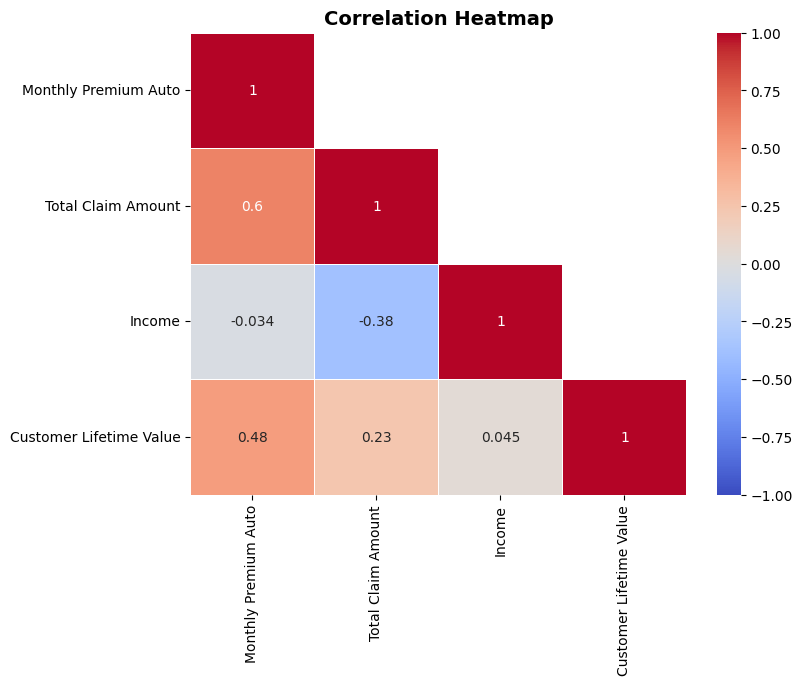

In [46]:
# Menghitung korelasi antar fitur
correlation_matrix = df[numerical_features].corr()

# Membuat heatmap dari korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1),
)

plt.title("Correlation Heatmap", size=14, weight="bold")
plt.show()

- Monthly Premium Auto memiliki korelasi positif yang cukup kuat dengan Total Claim Amount (0.45) dan Customer Lifetime Value (0.43), menunjukkan bahwa semakin tinggi Monthly Premium Auto, semakin tinggi Total Claim Amount dan CLV.
- Total Claim Amount memiliki korelasi negatif dengan Income (-0.4), menunjukkan bahwa pelanggan dengan Income lebih tinggi cenderung memiliki Total Claim Amount yang lebih rendah.
- Income tidak memiliki korelasi yang signifikan dengan Monthly Premium Auto (-0.00089), menandakan bahwa Income tidak banyak mempengaruhi Monthly Premium Auto.
- Customer Lifetime Value menunjukkan korelasi yang lemah dengan fitur Total Claim Amount (0.14) dan Income (0.066), yang mengindikasikan bahwa CLV tidak terlalu dipengaruhi oleh Total Claim Amount atau Income.

Karena Customer Lifetime Value (CLV) menunjukkan korelasi dengan Monthly Premium Auto, penting untuk menganalisis scatterplot yang dibedakan berdasarkan hue dari masing-masing fitur kategorikal.

In [47]:
# imports.py
from matplotlib.ticker import FuncFormatter

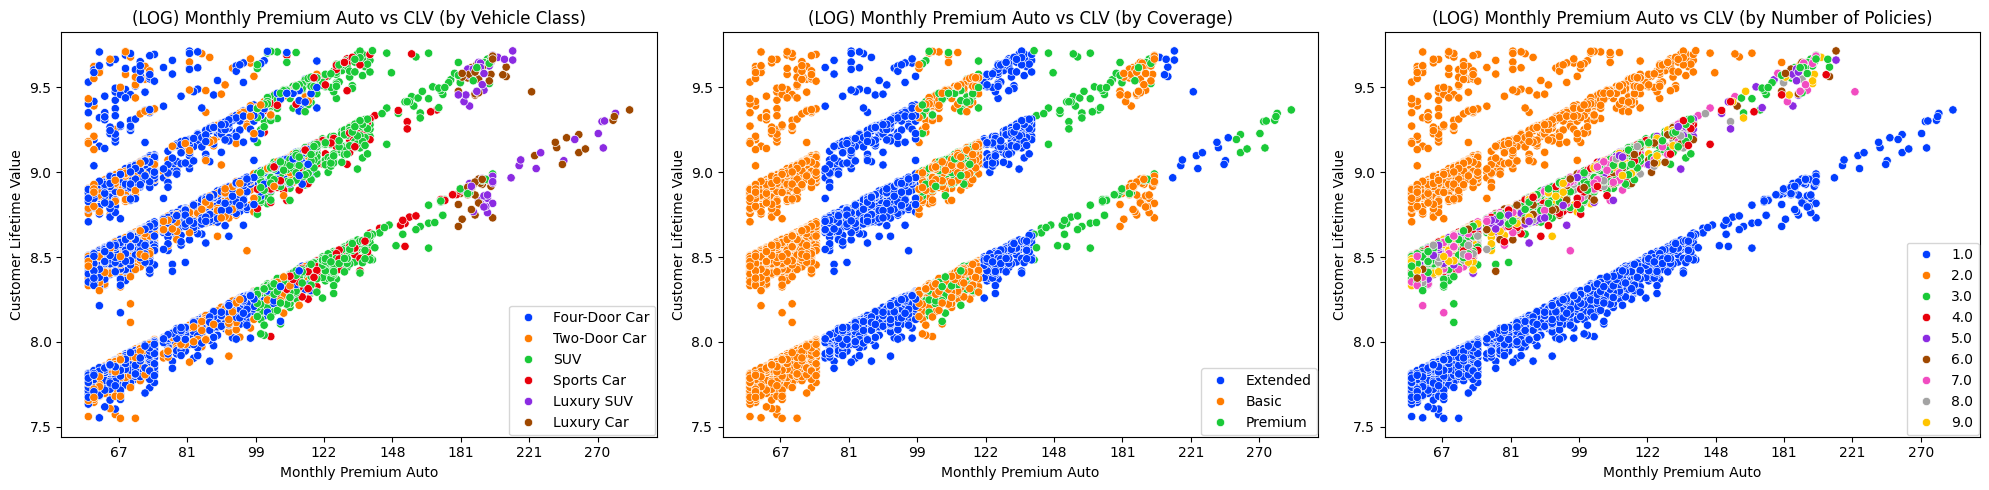

In [48]:
# Fungsi untuk mengubah kembali skala log ke skala asli
def inverse_log(x, _):
    return f"{np.exp(x):.0f}"  # np.expm1(x) adalah invers dari np.log1p(x)


clv_mpa = [
    "Vehicle Class",
    "Coverage",
    "Number of Policies",
]
plt.figure(figsize=(20, 5))
# Loop untuk membuat scatter plot untuk setiap fitur kategorikal
for i, feature in enumerate(clv_mpa):

    plt.subplot(1, 3, i + 1)  # Atur layout subplot (1 baris, 3 kolom)
    # Log transformasi untuk sumbu y dan x
    log_x = np.log(df["Monthly Premium Auto"])
    log_y = np.log(df["Customer Lifetime Value"])
    sns.scatterplot(
        data=df,
        x=log_x,
        y=log_y,
        hue=df[feature],
        palette="bright",
    )
    plt.title(f"(LOG) Monthly Premium Auto vs CLV (by {feature})", size=12)
    plt.xlabel("Monthly Premium Auto")
    plt.ylabel("Customer Lifetime Value")

    # Menggunakan formatter untuk mengubah skala log ke skala asli pada sumbu X dan Y
    plt.gca().xaxis.set_major_formatter(FuncFormatter(inverse_log))
    # plt.gca().yaxis.set_major_formatter(FuncFormatter(inverse_log))

    # Menambahkan legend di posisi kanan bawah
    plt.legend(loc="lower right", bbox_to_anchor=(1, 0), borderaxespad=0.1)

plt.tight_layout()  # Menjaga layout agar tidak saling bertumpukan
plt.show()

- 'Vehicle Class' menunjukkan adanya tingkatan atau hubungan implisit terhadap 'Monthly Premium Auto'
  - Kelas Bawah     : 'Four-Door Car' dan 'Two-Door Car'
  - Kelas Menengah  : 'SUV' dan 'Sport Car'
  - Kelas Atas      : 'Luxury SUV' dan 'Luxury Car'
- Terdapat pola yang jelas pada 'Coverage' pada grafik yang membagi data menjadi 8 kluster
  - 50 - 75   : Basic
  - 75 - 100  : Extended
  - 100 - 125 : Basic dan Premium
  - 125 - 150 : Extended
  - 150 - 200 : Premium
  - 175 - 200 : Basic
  - 200 - 250 : Extended
  - 250 - 300 : Premium  
Pola ini terjadi karena perusahaan mengatur produk asuransi berdasarkan segmen pelanggan yang berbeda
- 'Number of Policies' menunjukkan adanya tingkatan urutan terhadap 'Customer Lifetime Value'
  - 1 Polis : Pelanggan dengan 1 polis mungkin kurang loyal dan berkomitmen, sehingga mereka tidak diprioritaskan.
  - 2 Polis : Pelanggan dengan 2 polis mungkin berpotensi sehingga mereka diprioritaskan terlebih dahulu.
  - 3-9 Polis : Pelanggan yang memiliki 3 hingga 9 polis berada ditengah-tengah, mungkin disebabkan karena pelanggan tersebut bisa membawa risiko yang lebih besar dan biaya yang lebih tinggi bagi perusahaan.  
Dalam beberapa kasus, pelanggan dengan dua polis mungkin lebih menguntungkan karena profil risiko yang lebih rendah dan pengelolaan yang lebih sederhana.

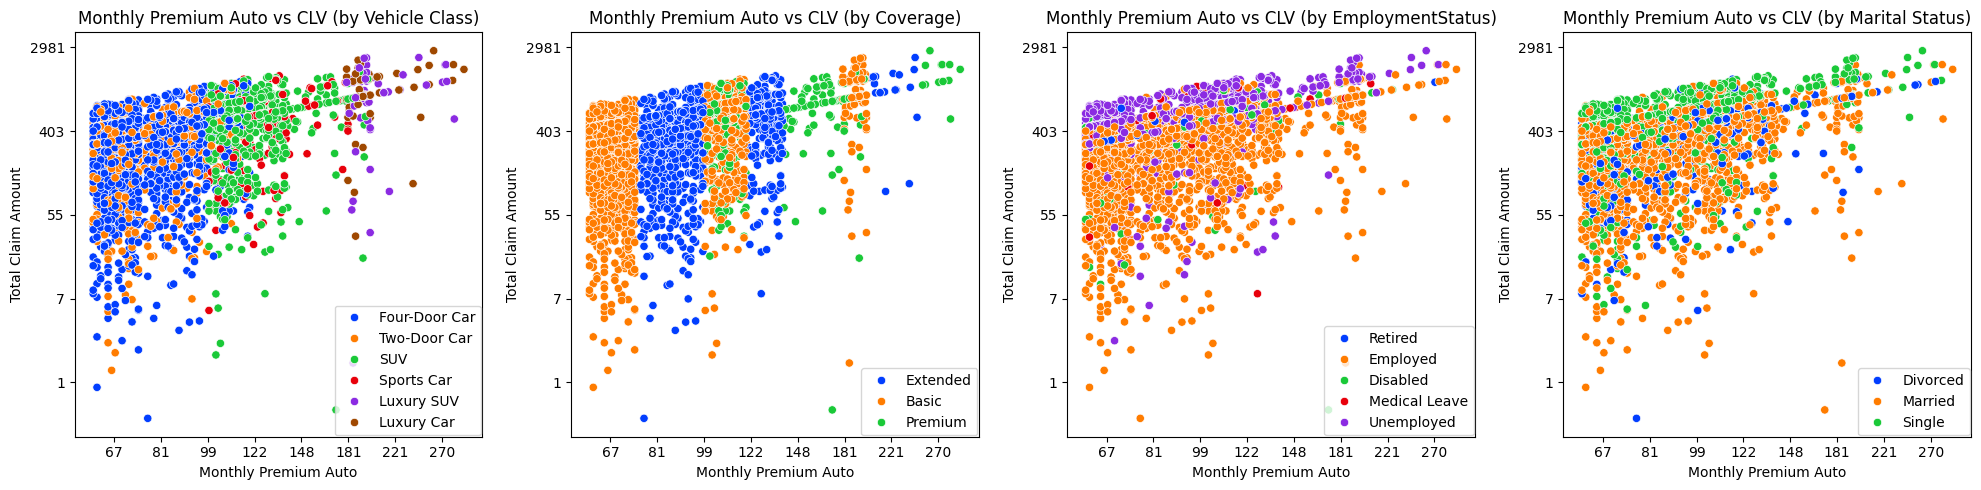

In [49]:
tca_mpa = [
    "Vehicle Class",
    "Coverage",
    "EmploymentStatus",
    "Marital Status",
]
plt.figure(figsize=(20, 5))

# Loop untuk membuat scatter plot untuk setiap fitur kategorikal
for i, feature in enumerate(tca_mpa):

    plt.subplot(1, 4, i + 1)  # Atur layout subplot (1 baris, 4 kolom)
    # Log transformasi untuk sumbu y dan x
    log_x = np.log(df["Monthly Premium Auto"])
    log_y = np.log(df["Total Claim Amount"])
    sns.scatterplot(
        data=df,
        x=log_x,
        y=log_y,
        hue=df[feature],
        palette="bright",
    )
    plt.title(f"Monthly Premium Auto vs CLV (by {feature})", size=12)
    plt.xlabel("Monthly Premium Auto")
    plt.ylabel("Total Claim Amount")

    # Menggunakan formatter untuk mengubah skala log ke skala asli pada sumbu X dan Y
    plt.gca().xaxis.set_major_formatter(FuncFormatter(inverse_log))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(inverse_log))

    # Menambahkan legend di posisi kanan bawah
    plt.legend(loc="lower right", bbox_to_anchor=(1, 0), borderaxespad=0.1)

plt.tight_layout()  # Menjaga layout agar tidak saling bertumpukan

plt.show()

- 'EmploymentStatus' menunjukkan adanya pola terhadap Total Claim Amount pada scatterplot. Pelanggan dengan status 'Unemployed' mengajukan Claim paling tinggi dari semua kategori, hal ini mungkin disebabkan oleh keterbatasan finansial yang membuat mereka lebih cenderung mengajukan klaim.

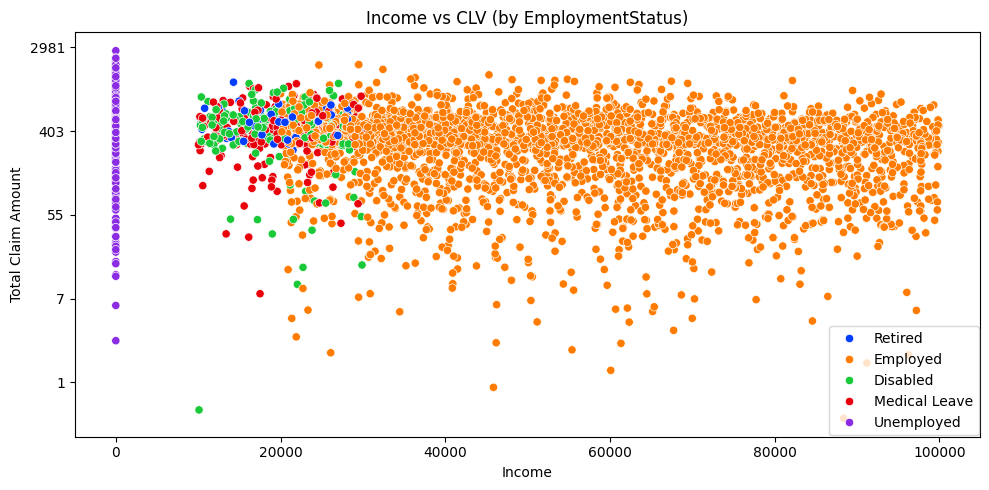

In [50]:
tca_income = [
    "EmploymentStatus",
]
plt.figure(figsize=(10, 5))

# Loop untuk membuat scatter plot untuk setiap fitur kategorikal
for i, feature in enumerate(tca_income):

    plt.subplot(1, 1, i + 1)  # Atur layout subplot (1 baris, 4 kolom)
    log_y = np.log(df["Total Claim Amount"])
    sns.scatterplot(
        data=df,
        x=df[
            "Income"  # Income tidak memiliki skewness atau outliers, jadi kita tidak perlu menerapkan Log untuk Income
        ],
        y=log_y,
        hue=df[feature],
        palette="bright",
    )
    plt.title(f"Income vs CLV (by {feature})", size=12)
    plt.xlabel("Income")
    plt.ylabel("Total Claim Amount")

    # Menggunakan formatter untuk mengubah skala log ke skala asli pada sumbu X dan Y
    plt.gca().yaxis.set_major_formatter(FuncFormatter(inverse_log))

    # Menambahkan legend di posisi kanan atas
    plt.legend(loc="lower right", bbox_to_anchor=(1, 0), borderaxespad=0.1)

plt.tight_layout()  # Menjaga layout agar tidak saling bertumpukan

plt.show()

Pada scatterplot terlihat jelas bahwa:
- Employed memiliki Income paling besar dari semua kategori
- Disabled, Medical Leave dan Retired berada di tengah-tengah
- Unemployed tidak memiliki Income sama sekali

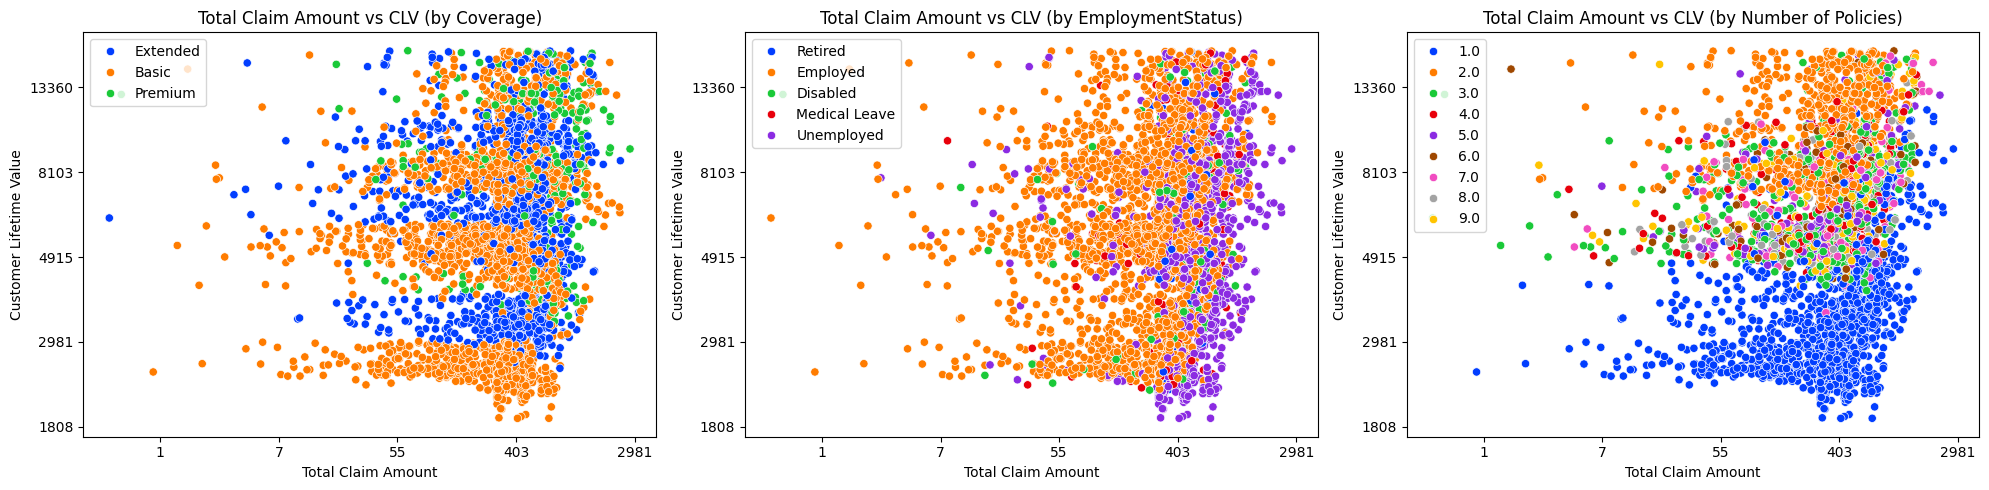

In [51]:
tca_clv = [
    "Coverage",
    "EmploymentStatus",
    "Number of Policies",
]

plt.figure(figsize=(20, 5))

# Loop untuk membuat scatter plot untuk setiap fitur kategorikal
for i, feature in enumerate(tca_clv):
    plt.subplot(1, 3, i + 1)  # Atur layout subplot (1 baris, 3 kolom)

    # Log transformasi untuk sumbu y dan x
    log_y = np.log(df["Customer Lifetime Value"])
    log_x = np.log(df["Total Claim Amount"])

    sns.scatterplot(
        data=df,
        y=log_y,
        x=log_x,
        hue=feature,
        palette="bright",
    )

    # Menggunakan label asli meskipun ada log transformasi
    plt.title(f"Total Claim Amount vs CLV (by {feature})", size=12)
    plt.xlabel("Total Claim Amount")  # Label asli
    plt.ylabel("Customer Lifetime Value")  # Label asli

    # Menggunakan formatter untuk mengubah skala log ke skala asli pada sumbu X dan Y
    plt.gca().xaxis.set_major_formatter(FuncFormatter(inverse_log))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(inverse_log))

    # Menambahkan legend di posisi kiri atas
    plt.legend(loc="upper left", bbox_to_anchor=(0, 1))

plt.tight_layout()  # Menjaga layout agar tidak saling bertumpukan
plt.show()

# 3. Modeling

In [52]:
# Import library untuk modeling
# imports.py
from sklearn.linear_model import (
    Ridge,
    Lasso,
    ElasticNet,
    LinearRegression,
)

from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
)

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
    KFold,
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
)
from sklearn.pipeline import Pipeline

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

Dataset yang akan digunakan sebagai sumber latihan model machine learning tidak dapat lasung digunakan karena pemodelan yang akan digunakan tidak dapat menerima inputan selain data numerik. Untuk itu perlu adanya transformasi kolom dengan cara encoding. Pada feature dengan data nominal seperti Vehicle Class, Employment Status, dan `Marital Status`, onehot encoding dapat diterapkan (binary encoding tidak digunakan karena jumlah kelas tidak banyak). Feature Coverage, Renew Offer Type, dan Education akan di-encode menggunakan ordinal encoder karena kelas pada feature-feature tersebut memiliki rangking.

onehot - "Vehicle Class", "Employment Status", "Marital Status" -> karena karena jumlah kelas tidak banyak


In [53]:
ordinal_mapping = [
    {
        "col": "Vehicle Class",
        "mapping": {
            None: 0,
            "Four-Door Car": 1,
            "Two-Door Car": 1,
            "SUV": 2,
            "Sports Car": 2,
            "Luxury SUV": 3,
            "Luxury Car": 3,
        },
    },
    {"col": "Coverage", "mapping": {None: 0, "Basic": 1, "Extended": 2, "Premium": 3}},
    {
        "col": "Renew Offer Type",
        "mapping": {None: 0, "Offer1": 1, "Offer2": 2, "Offer3": 3, "Offer4": 4},
    },
    {
        "col": "EmploymentStatus",
        "mapping": {
            None: 0,
            "Unemployed": 1,
            "Medical Leave": 2,
            "Disabled": 2,
            "Retired": 2,
            "Employed": 3,
        },
    },
    {
        "col": "Education",
        "mapping": {
            None: 0,
            "High School or Below": 1,
            "College": 2,
            "Bachelor": 3,
            "Master": 4,
            "Doctor": 5,
        },
    },
    {
        "col": "Number of Policies",
        "mapping": {None: 0, 1: 1, 2: 3, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2},
    },
]

Pada langkah ini, kita akan mengubah fitur kategorikal menjadi numerik, serta melakukan normalisasi dan pembuatan fitur baru jika diperlukan.

In [54]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(drop="first"), ["Marital Status"]),
        # ("Binary", ce.BinaryEncoder(), ["Number of Policies	"]),
        (
            "ordinal",
            ce.OrdinalEncoder(
                cols=[
                    "Vehicle Class",
                    "Coverage",
                    "Renew Offer Type",
                    "EmploymentStatus",
                    "Education",
                    "Number of Policies",
                ],
                mapping=ordinal_mapping,
            ),
            [
                "Vehicle Class",
                "Coverage",
                "Renew Offer Type",
                "EmploymentStatus",
                "Education",
                "Number of Policies",
            ],
        ),
    ],
    remainder="passthrough",
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Marital Status']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['Vehicle Class',
                                                      'Coverage',
                                                      'Renew Offer Type',
                                                      'EmploymentStatus',
                                                      'Education',
                                                      'Number of Policies'],
                                                mapping=[{'col': 'Vehicle '
                                                                 'Class',
                                                          'data_type': dtype('O'),
                                                          'mapping': None             0
Four-Door Car    1
Two-Door Car     1
SUV              2
Sports Car       2
L...
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': None                    0
High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
dtype: int64},
                                                         {'col': 'Number of '
                                                                 'Policies',
                                                          'data_type': dtype('float64'),
                                                          'mapping': NaN    0
1.0    1
2.0    3
3.0    2
4.0    2
5.0    2
6.0    2
7.0    2
8.0    2
9.0    2
dtype: int64}]),
                                 ['Vehicle Class', 'Coverage',
                                  'Renew Offer Type', 'EmploymentStatus',
                                  'Education', 'Number of Policies'])])

## Data Splitting

Pisahkan data menjadi Train dan Test untuk melatih model dan menguji performanya.

In [55]:
# Memisahkan data independen variabel dengan target
X = df.drop(["Customer Lifetime Value"], axis=1)
y = df["Customer Lifetime Value"]

# Identifikasi kolom kategorikal
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [56]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2024
)

X_train.shape, X_test.shape

((3681, 10), (921, 10))

In [57]:
# Mengaplikasikan transformasi pada dataset
# X_train_transformed = transformer.fit_transform(X_train)
# X_test_transformed = transformer.transform(X_test)


# pd.set_option("future.no_silent_downcasting", True)

# columns = transformer.get_feature_names_out()  # Mendapatkan nama kolom hasil encoding

# X_preprocessed_df = pd.DataFrame(X_train_transformed, columns=columns)

# 4. Benchmark Model

Memilih model machine learning yang sesuai dan latih model tersebut dengan data pelatihan.

Pada saat melakukan benchmark model, beberapa model akan melakukan cross validasi pada data train. Cross validasi dilakaukan dengan membagi data train menjadi beberapa bagian, pada kasus pembentukan model dataset ini adalah 5. Empat data diambil untuk di train menggunakan model lalu hasilnya dihitung menggunakan data sisnya, yang disebut data validasi. Pengulang dilakukan sehingga semua bagian data pernah menjadi data validasi. Nilai rata-ratanya dan standar deviasi akan dihitung untuk menentukan apakah model sudah cocok dengan dataset.

In [58]:
# Membuat pipeline untuk tiap model
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor(),
}

# Scaling for SVR and KNN (only those that need it)
scaled_models = ["SVR", "KNN"]

# List to store results
results = []

# Iterate through each model and evaluate
for name, model in models.items():
    if name in scaled_models:
        # Use StandardScaler for models that need scaling
        pipeline = Pipeline(
            [
                ("preprocessor", transformer),  # Tambahkan transformer di sini
                ("scaler", StandardScaler()),
                ("model", model),
            ]
        )
    else:
        # No scaling needed for tree-based or robust models
        pipeline = Pipeline(
            [
                ("preprocessor", transformer),  # Tambahkan transformer di sini
                ("model", model),
            ]
        )

    # Pemodelan dilakukan dalam skala logaritmik, kemudian di-inverse kembali untuk interpretasi
    log_model = TransformedTargetRegressor(
        regressor=pipeline, func=np.log, inverse_func=np.exp
    )

    # Cross-validation setup
    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)

    # RMSE
    model_cv_rmse = cross_val_score(
        log_model,
        X_train,
        y_train,
        cv=crossval,
        scoring="neg_root_mean_squared_error",
        error_score="raise",  # Melempar error jika terjadi kesalahan
    )

    # MAE
    model_cv_mae = cross_val_score(
        log_model,
        X_train,
        y_train,
        cv=crossval,
        scoring="neg_mean_absolute_error",
        error_score="raise",
    )

    # MAPE
    model_cv_mape = cross_val_score(
        log_model,
        X_train,
        y_train,
        cv=crossval,
        scoring="neg_mean_absolute_percentage_error",
        error_score="raise",
    )

    # Append results to list
    results.append(
        {
            "Model": name,
            "Mean RMSE": -model_cv_rmse.mean(),  # Ubah ke positif
            "STD RMSE": model_cv_rmse.std(),
            "Mean MAE": -model_cv_mae.mean(),  # Ubah ke positif
            "STD MAE": model_cv_mae.std(),
            "Mean MAPE": -model_cv_mape.mean(),  # Ubah ke positif
            "STD MAPE": model_cv_mape.std(),
        }
    )

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Menambahkan ranking berdasarkan tiap metrik
results_df["Rank Mean RMSE"] = results_df["Mean RMSE"].rank(ascending=True)
results_df["Rank STD RMSE"] = results_df["STD RMSE"].rank(ascending=True)
results_df["Rank Mean MAE"] = results_df["Mean MAE"].rank(ascending=True)
results_df["Rank STD MAE"] = results_df["STD MAE"].rank(ascending=True)
results_df["Rank Mean MAPE"] = results_df["Mean MAPE"].rank(ascending=True)
results_df["Rank STD MAPE"] = results_df["STD MAPE"].rank(ascending=True)

# Urutkan model berdasarkan rank RMSE, MAE, dan MAPE
results_df = results_df.sort_values(
    by=["Rank Mean RMSE", "Rank Mean MAE", "Rank Mean MAPE"]
)

In [59]:
results_df

Model    Mean RMSE   STD RMSE     Mean MAE    STD MAE  \
5  GradientBoosting   876.995845  77.860084   331.144828  22.131740   
4      RandomForest   923.027744  63.097839   338.394988  23.441043   
7               SVR   971.846727  63.580539   479.846177  14.432624   
9      XGBRegressor   972.260762  33.823555   361.257944  13.721981   
1             Ridge  1061.858088  25.945855   609.997641  15.248222   
0  LinearRegression  1062.129506  26.095483   610.222014  15.380575   
6      DecisionTree  1208.297535  75.704229   424.574551  17.254074   
8               KNN  1352.995286  45.337964   727.580668  33.012798   
2             Lasso  3012.786011  25.078167  2366.264901  30.533396   
3        ElasticNet  3026.686540  37.747656  2371.442878  33.575227   

   Mean MAPE  STD MAPE  Rank Mean RMSE  Rank STD RMSE  Rank Mean MAE  \
5   0.039566  0.001890             1.0           10.0            1.0   
4   0.040926  0.002221             2.0            7.0            2.0   
7   0.063470  0.001368             3.0            8.0            5.0   
9   0.043921  0.001508             4.0            4.0            3.0   
1   0.079128  0.001569             5.0            2.0            6.0   
0   0.079123  0.001591             6.0            3.0            7.0   
6   0.052759  0.001545             7.0            9.0            4.0   
8   0.097466  0.005335             8.0            6.0            8.0   
2   0.417611  0.005614             9.0            1.0            9.0   
3   0.417802  0.005877            10.0            5.0           10.0   

   Rank STD MAE  Rank Mean MAPE  Rank STD MAPE  
5           6.0             1.0            6.0  
4           7.0             2.0            7.0  
7           2.0             5.0            1.0  
9           1.0             3.0            2.0  
1           3.0             7.0            4.0  
0           4.0             6.0            5.0  
6           5.0             4.0            3.0  
8           9.0             8.0            8.0  
2           8.0             9.0            9.0  
3          10.0            10.0           10.0

- Analisis
  - Gradient Boosting memiliki nilai terendah dalam Mean RMSE, Mean MAE, dan Mean MAPE, menunjukkan bahwa ia memberikan akurasi prediksi yang baik. Namun, STD RMSE dan STD MAE yang terendah dari kebanyakan model, menunjukkan ketidakstabilan model.
  - XGBRegressor juga memiliki performa yang baik dari kebanyakan model.

### Perhitungan Skor Total

Rumus untuk menghitung **Skor Total** adalah:

$$Skor Total = \text{Mean RMSE} + \alpha \times \text{STD RMSE} + \text{Mean MAE} + \alpha \times \text{STD MAE} + \text{Mean MAPE} + \alpha \times \text{STD MAPE} $$

Dengan $\alpha$ sebagai faktor pengali untuk standar deviasi (misalnya, $\alpha = 0.5$).


Mencari Model terbaik menggunakan K-Fold

In [60]:
# Faktor alpha
alpha = 0.5


# Menghitung Skor Total
results_df["Skor Total"] = (
    results_df["Mean RMSE"]
    + alpha * results_df["STD RMSE"]
    + results_df["Mean MAE"]
    + alpha * results_df["STD MAE"]
    + results_df["Mean MAPE"]
    + alpha * results_df["STD MAPE"]
)

# Menampilkan model dengan skor total terkecil (model terbaik)
results_df = results_df.sort_values(by="Skor Total")
results_df[["Model", "Skor Total"]].reset_index(drop=True)

Model   Skor Total
0  GradientBoosting  1258.177096
1      RandomForest  1304.734209
2      XGBRegressor  1357.336149
3               SVR  1490.763639
4      DecisionTree  1679.404768
5             Ridge  1692.532680
6  LinearRegression  1693.169468
7               KNN  2119.851469
8             Lasso  5407.277113
9        ElasticNet  5434.211600

Model dengan Skor Total terkecil adalah `GradientBoosting` dengan skor total 1258.4, kita akan menggunakan `GradientBoosting`,`Random Forest` dan `XGBRegressor`

## Hyperparameter Tuning

In [61]:
# imports.py
from sklearn.ensemble import VotingRegressor

In [62]:
# Fungsi untuk menghitung skor regresi
def regression_score(model_name, test, pred):
    rmse = np.sqrt(mean_squared_error(test, pred))
    mae = mean_absolute_error(test, pred)
    mape = mean_absolute_percentage_error(test, pred)
    return pd.DataFrame({"RMSE": rmse, "MAE": mae, "MAPE": mape}, index=[model_name])


# ----Gradient Boosting Regressor----
gbr = GradientBoostingRegressor(random_state=2024)

# Membangun pipeline untuk Gradient Boosting dengan log transformasi
log_gbr_estimator = TransformedTargetRegressor(
    regressor=Pipeline(
        steps=[
            ("preprocessor", transformer),
            ("scaler", StandardScaler()),
            ("model", gbr),
        ]
    ),
    func=np.log,
    inverse_func=np.exp,
)

log_gbr_estimator.fit(X_train, y_train)
y_pred_gbr = log_gbr_estimator.predict(X_test)

# Menghitung skor untuk Gradient Boosting
gbr_scores = regression_score("GradientBoosting", y_test, y_pred_gbr)

# ----XGBoost Regressor----
xgb = XGBRegressor(max_depth=3, random_state=2024)


# Membangun pipeline untuk XGBoost dengan log transformasi
log_xgb_estimator = TransformedTargetRegressor(
    regressor=Pipeline(
        steps=[
            ("preprocessor", transformer),
            ("scaler", StandardScaler()),
            ("model", xgb),
        ]
    ),
    func=np.log,
    inverse_func=np.exp,
)

log_xgb_estimator.fit(X_train, y_train)
y_pred_xgb = log_xgb_estimator.predict(X_test)


# Menghitung skor untuk XGBoost
xgb_scores = regression_score("XGBRegressor", y_test, y_pred_xgb)


# ----Voting Regressor----
log_voting_estimator = VotingRegressor(
    estimators=[
        ("GradientBoosting", log_gbr_estimator),
        ("XGBRegressor", log_xgb_estimator),
    ]
)

# Melatih model
log_voting_estimator.fit(X_train, y_train)

# Memprediksi dengan model gabungan
y_pred_voting = log_voting_estimator.predict(X_test)

# Menghitung skor untuk model gabungan
voting_score = regression_score("VotingRegressor", y_test, y_pred_voting)

# Menggabungkan hasil skor
combined_scores = pd.concat([gbr_scores, xgb_scores, voting_score])
combined_scores

RMSE         MAE      MAPE
GradientBoosting  1036.257247  392.704841  0.044744
XGBRegressor      1061.142164  418.825104  0.048210
VotingRegressor   1042.767097  399.392390  0.045559

### GradientBoostingRegressor Tuning

Kita tidak menggunakan metrik MAPE karena terdapat nilai 0 dalam fitur Income yang dapat menyebabkan perhitungan menjadi tidak stabil. Mengingat kita tidak menghapus outlier pada Monthly Premium Auto dan Total Claim Amount, kita memerlukan metrik yang lebih robust terhadap pengaruh outlier. Oleh karena itu, kita akan menggunakan Mean Absolute Error (MAE), karena MAE lebih robust dibandingkan Root Mean Squared Error (RMSE) dalam menghadapi outlier.

In [63]:
# Fungsi untuk melakukan hyperparameter tuning pada GradientBoostingRegressor
def tune_gbr(X_train, y_train, transformer, crossval):
    gbr = GradientBoostingRegressor(random_state=2024)

    # Membangun pipeline
    estimator = Pipeline(
        steps=[
            ("preprocessor", transformer),
            ("scaler", StandardScaler()),
            ("model", gbr),
        ]
    )

    # Parameter Grid untuk GradientBoostingRegressor
    hyperparam_space = {
        "model__n_estimators": [100, 200, 300, 400, 500],       # Jumlah pohon
        "model__learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],    # learning_rate lebih rendah dapat membantu menghindari overfitting
        "model__max_depth": [3, 4, 5, 6, 7],                    # mengurangi max_depth dapat membantu dalam regularisasi
        "model__min_samples_split": [2, 5, 10],                 # Minimum sampel untuk membagi node, menghindari pembagian yang tidak signifikan
        "model__min_samples_leaf": [1, 2, 3, 4],                # Minimum sampel di daun, menambah ini dapat mengurangi overfitting
        "model__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],          # Fraksi sampel untuk setiap pohon, membantu regularisasi
        "model__max_features": [None, "sqrt"],                  # Jumlah fitur yang digunakan, 'sqrt' adalah pilihan yang baik untuk mengurangi overfitting
        "model__alpha": [0.5, 0.75, 0.9]                        # Parameter untuk menghitung MAE dalam Gradient Boosting
    }

    random_search_gbr = RandomizedSearchCV(
        estimator,
        param_distributions=hyperparam_space,
        n_iter=100,  # Tentukan berapa banyak kombinasi yang ingin dicoba
        scoring="neg_mean_absolute_error", # MAE lebih robust terhadap outlier dibandingkan RMSE
        refit='mae',
        cv=crossval,
        n_jobs=-1,
        random_state=2024,
    )
    random_search_gbr.fit(X_train, y_train)
    return random_search_gbr

In [64]:
# Menggunakan fungsi untuk tuning, memakan waktu 1 menit
gbr_search = tune_gbr(X_train, y_train, transformer, crossval)

# Menampilkan hasil terbaik dari masing-masing pencarian
print("Best parameters for GradientBoostingRegressor:", gbr_search.best_params_)
print("Best score for GradientBoostingRegressor:", gbr_search.best_score_)

Best parameters for GradientBoostingRegressor: {'model__subsample': 0.7, 'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 3, 'model__max_features': None, 'model__max_depth': 6, 'model__learning_rate': 0.05, 'model__alpha': 0.9}
Best score for GradientBoostingRegressor: -330.9061427430719


### XGBoostingRegressor Tuning

In [65]:
# Fungsi untuk melakukan hyperparameter tuning pada XGBRegressor
def tune_xgb(X_train, y_train, transformer, crossval):
    xgb = XGBRegressor(random_state=2024)

    # Membangun pipeline
    estimator = Pipeline(
        steps=[
            ("preprocessor", transformer),
            ("scaler", StandardScaler()),
            ("model", xgb),
        ]
    )

    # Parameter Grid untuk XGBRegressor
    hyperparam_space = {
        "model__n_estimators": [100, 200, 300, 400, 500, 600, 700],  # Meningkatkan hingga 700
        "model__learning_rate": [0.01, 0.05, 0.1, 0.2],  # Menambahkan nilai 0.05
        "model__max_depth": [3, 4, 5, 6, 7, 8],  # Menambahkan kedalaman lebih
        "model__min_child_weight": [1, 2, 3, 4, 5, 6],  # Menambahkan 6
        "model__subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Mengurangi nilai minimum ke 0.5
        "model__colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Mengurangi nilai minimum ke 0.5
        "model__gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5],  # Menambahkan 0.5
        "model__reg_alpha": [0, 0.1, 0.5, 1, 10],  # Menambahkan nilai 0.5
        "model__reg_lambda": [0, 0.1, 0.5, 1, 10],  # Menambahkan nilai 0.5
        "model__max_bin": [256, 512, 1024],  # Menambahkan parameter untuk XGBoost yang dapat membantu dengan data besar
    }

    random_search_xgb = RandomizedSearchCV(
        estimator,
        param_distributions=hyperparam_space,
        n_iter=50,  # Jumlah kombinasi acak yang akan diuji
        cv=crossval,  # Jumlah fold cross-validation
        scoring="neg_mean_absolute_error", # MAE lebih robust terhadap outlier dibandingkan RMSE
        refit='mae',
        n_jobs=-1,  # Memaksimalkan penggunaan CPU
        random_state=2024,
    )

    random_search_xgb.fit(X_train, y_train)
    return random_search_xgb

In [66]:
# Menggunakan fungsi untuk tuning, memakan waktu 20 detik
xgb_search = tune_xgb(X_train, y_train, transformer, crossval)

# Menampilkan hasil terbaik dari masing-masing pencarian
print("Best parameters for XGBRegressor:", xgb_search.best_params_)
print("Best score for XGBRegressor:", xgb_search.best_score_)

Best parameters for XGBRegressor: {'model__subsample': 0.9, 'model__reg_lambda': 1, 'model__reg_alpha': 10, 'model__n_estimators': 300, 'model__min_child_weight': 3, 'model__max_depth': 4, 'model__max_bin': 256, 'model__learning_rate': 0.05, 'model__gamma': 0.4, 'model__colsample_bytree': 1.0}
Best score for XGBRegressor: -343.8676966270047


In [67]:
gbr_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model__subsample', 'param_model__n_estimators', 'param_model__min_samples_split', 'param_model__min_samples_leaf', 'param_model__max_features', 'param_model__max_depth', 'param_model__learning_rate', 'param_model__alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [68]:
def create_results_df(search_results, model_name):
    results_df = pd.DataFrame(search_results.cv_results_)
    required_columns = [
        'params',
        'mean_test_score',
        'std_test_score',
        'rank_test_score'
    ]
    filtered_results_df = results_df[required_columns]
    sorted_results_df = filtered_results_df.sort_values(by=['mean_test_score', 'std_test_score'], ascending=[False, True])
    sorted_results_df['model'] = model_name
    return sorted_results_df

# Mengatur lebar tampilan kolom
pd.set_option('display.max_colwidth', None)

# Membuat DataFrame untuk GradientBoostingRegressor
gbr_sorted_results_df = create_results_df(gbr_search, 'GradientBoostingRegressor')

# Membuat DataFrame untuk XGBRegressor
xgb_sorted_results_df = create_results_df(xgb_search, 'XGBRegressor')

# Menggabungkan hasil dan mengatur rank_test_score sebagai index
final_sorted_results_df = pd.concat([gbr_sorted_results_df, xgb_sorted_results_df])
final_sorted_results_df = final_sorted_results_df.sort_values(by=['mean_test_score', 'std_test_score'], ascending=[False, True]).set_index('rank_test_score')

# Menampilkan 10 hasil teratas
print("Best parameters and scores from both models:")
final_sorted_results_df.head(10)

Best parameters and scores from both models:


params  \
rank_test_score                                                                                                                                                                                                                                                                         
1                                                           {'model__subsample': 0.7, 'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 3, 'model__max_features': None, 'model__max_depth': 6, 'model__learning_rate': 0.05, 'model__alpha': 0.9}   
2                                                           {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 3, 'model__max_features': None, 'model__max_depth': 5, 'model__learning_rate': 0.05, 'model__alpha': 0.9}   
3                                                           {'model__subsample': 0.9, 'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': None, 'model__max_depth': 5, 'model__learning_rate': 0.01, 'model__alpha': 0.5}   
4                                                           {'model__subsample': 1.0, 'model__n_estimators': 400, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': None, 'model__max_depth': 6, 'model__learning_rate': 0.01, 'model__alpha': 0.9}   
5                                                          {'model__subsample': 0.6, 'model__n_estimators': 400, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': 7, 'model__learning_rate': 0.01, 'model__alpha': 0.9}   
6                                                           {'model__subsample': 1.0, 'model__n_estimators': 400, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': 7, 'model__learning_rate': 0.01, 'model__alpha': 0.5}   
7                                                           {'model__subsample': 1.0, 'model__n_estimators': 400, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': 5, 'model__learning_rate': 0.01, 'model__alpha': 0.9}   
8                                                          {'model__subsample': 0.9, 'model__n_estimators': 100, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': None, 'model__max_depth': 4, 'model__learning_rate': 0.1, 'model__alpha': 0.75}   
9                                                          {'model__subsample': 0.8, 'model__n_estimators': 500, 'model__min_samples_split': 5, 'model__min_samples_leaf': 3, 'model__max_features': None, 'model__max_depth': 4, 'model__learning_rate': 0.01, 'model__alpha': 0.75}   
1                {'model__subsample': 0.9, 'model__reg_lambda': 1, 'model__reg_alpha': 10, 'model__n_estimators': 300, 'model__min_child_weight': 3, 'model__max_depth': 4, 'model__max_bin': 256, 'model__learning_rate': 0.05, 'model__gamma': 0.4, 'model__colsample_bytree': 1.0}   

                 mean_test_score  std_test_score                      model  
rank_test_score                                                              
1                    -330.906143       22.569904  GradientBoostingRegressor  
2                    -331.696006       18.947512  GradientBoostingRegressor  
3                    -333.804184       20.229291  GradientBoostingRegressor  
4                    -334.723871       24.672791  GradientBoostingRegressor  
5                    -338.176691       21.049112  GradientBoostingRegressor  
6                    -338.658341       23.582103  GradientBoostingRegressor  
7                    -342.029240       23.082622  GradientBoostingRegressor  
8                    -342.717738       19.824943  GradientBoostingRegressor  
9                    -342.902106       22.195258  GradientBoostingRegressor  
1                    -343.867697       1

In [69]:
# Fit model GradientBoostingRegressor yang sudah dilakukan hyperparameter tuning
gbr_tuned_estimator = gbr_search.best_estimator_
gbr_tuned_estimator.fit(X_train, y_train)
y_pred_tuned_gbr = gbr_tuned_estimator.predict(X_test)

# Fit model XGBRegressor yang sudah dilakukan hyperparameter tuning
xgb_tuned_estimator = xgb_search.best_estimator_
xgb_tuned_estimator.fit(X_train, y_train)
y_pred_tuned_xgb = xgb_tuned_estimator.predict(X_test)

# Membuat Voting Regressor dengan model yang sudah dituning
voting_regressor_tuned = VotingRegressor(
    estimators=[
        ("GradientBoosting", gbr_tuned_estimator),
        ("XGBRegressor", xgb_tuned_estimator),
    ]
)

# Fit model Voting Regressor
voting_regressor_tuned.fit(X_train, y_train)

# Prediksi menggunakan Voting Regressor yang sudah dituning
y_pred_tuned_voting = voting_regressor_tuned.predict(X_test)

# Menggabungkan hasil evaluasi untuk semua model sebelum dan sesudah tuning
combined_results = pd.concat(
    [
        regression_score("GradientBoosting", y_test, y_pred_gbr).assign(Tuning="Before"),
        regression_score("GradientBoosting", y_test, y_pred_tuned_gbr).assign(Tuning="After"),
        regression_score("XGBoost", y_test, y_pred_xgb).assign(Tuning="Before"),
        regression_score("XGBoost", y_test, y_pred_tuned_xgb).assign(Tuning="After"),
        regression_score("VotingRegressor", y_test, y_pred_voting).assign(Tuning="Before"),
        regression_score("VotingRegressor", y_test, y_pred_tuned_voting).assign(Tuning="After"),
    ],
    axis=0,
)

# Menampilkan hasil evaluasi
display(combined_results[["Tuning", "RMSE", "MAE", "MAPE"]])

Tuning         RMSE         MAE      MAPE
GradientBoosting  Before  1036.257247  392.704841  0.044744
GradientBoosting   After  1039.978987  397.023059  0.045490
XGBoost           Before  1061.142164  418.825104  0.048210
XGBoost            After  1049.880945  404.798731  0.046912
VotingRegressor   Before  1042.767097  399.392390  0.045559
VotingRegressor    After  1040.349507  396.193268  0.045223

## 3.6. Model Explanation

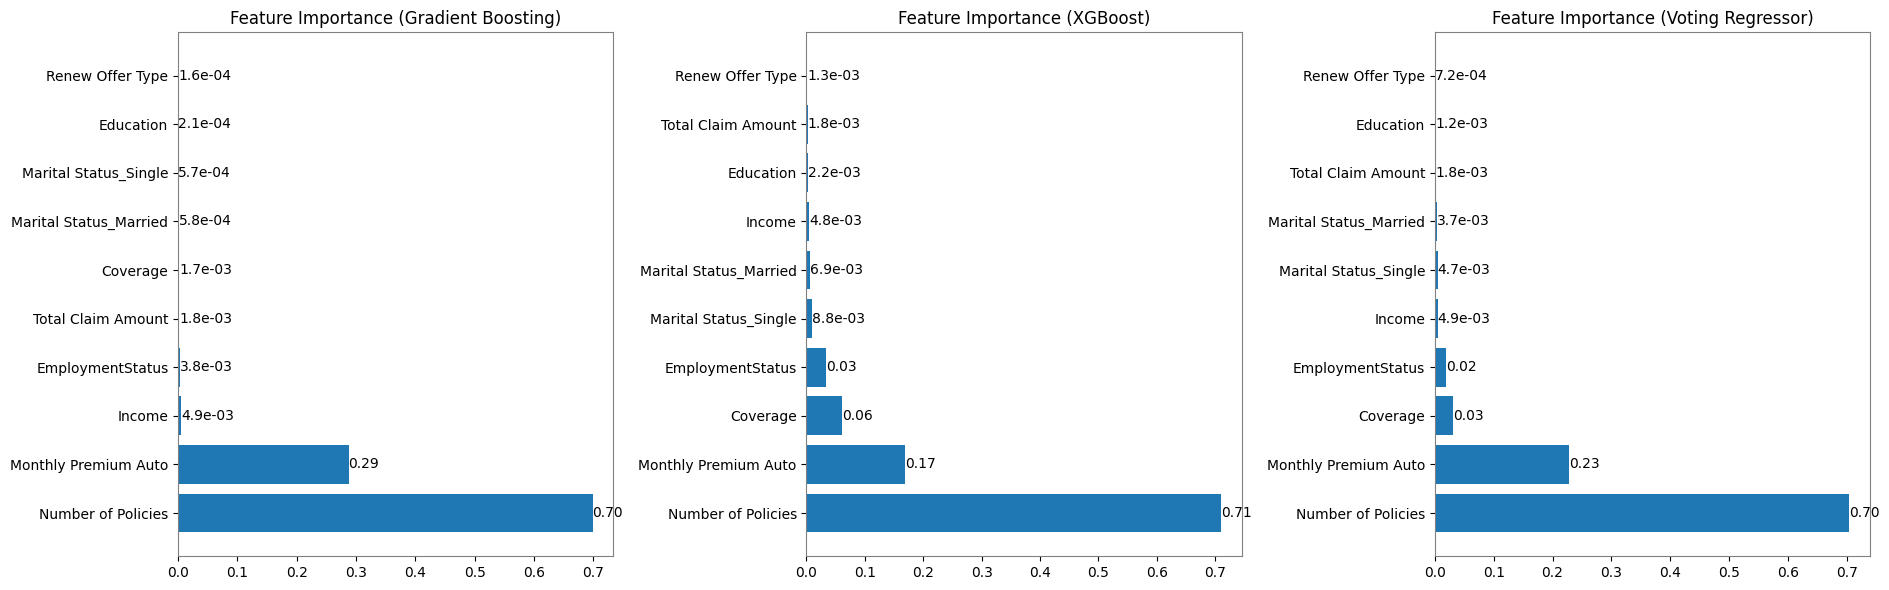

In [79]:
# Mendapatkan model dari VotingRegressor
models = {
    "Gradient Boosting": log_voting_estimator.named_estimators_["GradientBoosting"].regressor_.named_steps["model"],
    "XGBoost": log_voting_estimator.named_estimators_["XGBRegressor"].regressor_.named_steps["model"]
}

# Mendapatkan nama fitur dari transformer dan menghilangkan prefiks yang tidak diinginkan
feature_names = log_gbr_estimator.regressor_.named_steps['preprocessor'].get_feature_names_out()
feature_names = [name.replace("ordinal__", "").replace("remainder__", "").replace("onehot__", "") for name in feature_names]

# Menghitung feature importance
importance_dict = {name: model.feature_importances_ for name, model in models.items()}

# Membuat subplot untuk feature importance
fig, axes = plt.subplots(1, 3, figsize=(19, 6))

# Visualisasi feature importance
for i, (name, importance) in enumerate(importance_dict.items()):
    importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance}).sort_values(by="Importance", ascending=False)

    axes[i].barh(importance_df["Feature"].head(10), importance_df["Importance"].head(10))
    axes[i].set_title(f"Feature Importance ({name})")
    
    for index, value in enumerate(importance_df["Importance"].head(10)):
        # Menggunakan format eksponensial jika nilai < 0.01
        if value < 0.01:
            axes[i].text(value, index, f"{value:.1e}", va="center")
        else:
            axes[i].text(value, index, f"{value:.2f}", va="center")

    # Mengatur warna border kotak menjadi abu-abu
    for spine in axes[i].spines.values():
        spine.set_edgecolor('gray')  # Mengatur warna border

# Menghitung dan menampilkan rata-rata feature importance untuk Voting Regressor
combined_importance = sum(importance_dict.values()) / len(importance_dict)
combined_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": combined_importance}).sort_values(by="Importance", ascending=False)

# Plot rata-rata feature importance untuk Voting Regressor
axes[2].barh(combined_importance_df["Feature"].head(10), combined_importance_df["Importance"].head(10))
axes[2].set_title("Feature Importance (Voting Regressor)")

for index, value in enumerate(combined_importance_df["Importance"].head(10)):
    # Menggunakan format eksponensial jika nilai < 0.01
    if value < 0.01:
        axes[2].text(value, index, f"{value:.1e}", va="center")
    else:
        axes[2].text(value, index, f"{value:.2f}", va="center")
    
for spine in axes[2].spines.values():
    spine.set_edgecolor('gray')  # Mengatur warna border

plt.tight_layout()
plt.show()

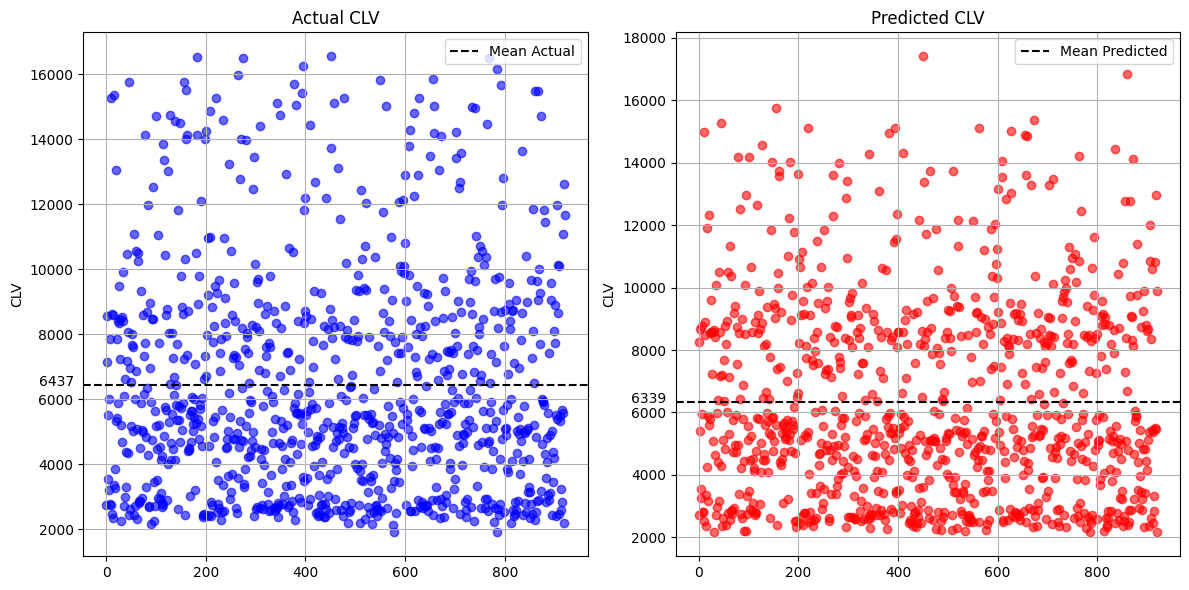

In [71]:
# y_test        = Aktual
# y_pred_voting = Predict

data = [  # Title, color
    (y_test, "Actual CLV", "b"),
    (y_pred_voting, "Predicted CLV", "r"),
]

# Membuat ukuran plot
plt.figure(figsize=(12, 6))

# Loop untuk membuat subplot
for i, (y_values, title, color) in enumerate(data):
    plt.subplot(1, 2, i + 1)  # 1 baris, 2 kolom
    plt.scatter(np.arange(len(y_values)), y_values, color=color, alpha=0.6)

    mean_value = y_values.mean()
    plt.axhline(
        y=mean_value, color="k", linestyle="--", label=f"Mean {title.split()[0]}"
    )
    plt.text(
        -65,
        mean_value + 100,
        f"{mean_value:.0f}",
        color="k",
        ha="right",
        va="center",
        fontsize=10,
    )

    plt.title(title)
    plt.xlabel("")
    plt.ylabel("CLV")
    plt.grid(True)
    plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

# Appendix A Saving The Model

In [72]:
import pickle

In [87]:
# # Menyimpan DataFrame ke CSV
# df.to_csv("CLV Dataframe.csv", index=False)

In [73]:
# Save model untuk deploy

# Simpan model ke file pickle
# with open('CLV VotingRegressor Estimator.sav', 'wb') as file:
#     pickle.dump(log_voting_estimator, file)

# print("Model berhasil disimpan")

Model berhasil disimpan


In [74]:
# # Load model dari file pickle
# with open('CLV VotingRegressor Estimator.sav', 'rb') as file:
#     loaded_model = pickle.load(file)

# print("Model berhasil dimuat.")

Model berhasil dimuat.


In [80]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

np.float64(1042.7670972374929)

In [132]:
# # Load DataFrame from CSV
# loaded_df = pd.read_csv("CLV Dataframe.csv")

# # Define input prompts for each feature
# feature_prompts = {
#     "Vehicle Class": {"1": "Four-Door Car","2": "Two-Door Car","3": "SUV","4": "Sports Car","5": "Luxury SUV","6": "Luxury Car"},
#     "Coverage": {"1": "Basic","2": "Extended","3": "Premium"},
#     "Renew Offer Type": {"1": "Offer1","2": "Offer2","3": "Offer3","4": "Offer4"},
#     "EmploymentStatus": {"1": "Employed","2": "Unemployed","3": "Medical Leave","4": "Disabled","5": "Retired"},
#     "Marital Status": {"1": "Single","2": "Married","3": "Divorced"},
#     "Education": {"1": "High School or Below","2": "College","3": "Bachelor","4": "Master","5": "Doctor"},
#     "Number of Policies": "numeric",
#     "Monthly Premium Auto": "numeric",
#     "Total Claim Amount": "numeric",
#     "Income": "numeric"
# }

# def get_input(prompt, is_numeric=False, min_val=None, max_val=None):
#     """Get user input based on prompt, and check for numeric ranges if required."""
#     if is_numeric:
#         while True:
#             try:
#                 value = float(input(prompt))
#                 if min_val is not None and max_val is not None and not (min_val <= value <= max_val):
#                     raise ValueError
#                 return value
#             except ValueError:
#                 print(f"Invalid input, please enter a number between {min_val} and {max_val}.")
#     else:
#         print(f"Select {prompt}:")
#         for key, value in feature_prompts[prompt].items():
#             print(f"{key}. {value}")
#         while True:
#             choice = input(f"Select {prompt} (1-{len(feature_prompts[prompt])}): ")
#             if choice in feature_prompts[prompt]:
#                 return feature_prompts[prompt][choice]
#             else:
#                 print("Invalid choice, please try again.")

# if __name__ == "__main__":
#     selections = {}
    
#     for feature, options in feature_prompts.items():
#         if options == "numeric":
#             min_val = loaded_df[feature].min()
#             max_val = loaded_df[feature].max()
#             selections[feature] = get_input(f"Enter {feature} ({min_val}-{max_val}): ", is_numeric=True, min_val=min_val, max_val=max_val)
#         else:
#             selections[feature] = get_input(feature)

#     # Convert selections to DataFrame
#     selections_df = pd.DataFrame(selections.items(), columns=["Feature", "Choice"])
    
#     # Display the summary of selections
#     print("\nSummary of your selections:")
#     print(selections_df.to_string(index=False))

#     # Prepare customer input for prediction
#     customer_df = pd.DataFrame([selections])

#     # Display customer_df
#     print("\nCustomer Data for Prediction:\n")
#     print(customer_df.to_string(index=False))

#     # Make prediction
#     clv_prediction = loaded_model.predict(customer_df)
#     print(f"\nCLV Prediction : {clv_prediction[0]}")


Select Vehicle Class:
1. Four-Door Car
2. Two-Door Car
3. SUV
4. Sports Car
5. Luxury SUV
6. Luxury Car


Select Coverage:
1. Basic
2. Extended
3. Premium
Select Renew Offer Type:
1. Offer1
2. Offer2
3. Offer3
4. Offer4
Select EmploymentStatus:
1. Employed
2. Unemployed
3. Medical Leave
4. Disabled
5. Retired
Select Marital Status:
1. Single
2. Married
3. Divorced
Select Education:
1. High School or Below
2. College
3. Bachelor
4. Master
5. Doctor

Summary of your selections:
             Feature               Choice
       Vehicle Class        Four-Door Car
            Coverage                Basic
    Renew Offer Type               Offer1
    EmploymentStatus             Employed
      Marital Status               Single
           Education High School or Below
  Number of Policies                  1.0
Monthly Premium Auto                111.0
  Total Claim Amount                111.0
              Income                111.0

Customer Data for Prediction:

Vehicle Class Coverage Renew Offer Type EmploymentStatus Marital Status            Education  Number of Policies  Monthly Premium A